In [1]:
import sys
import os
import urllib
import zipfile
import geopandas as gpd
import seaborn as sns
import libpysal as lps
import pysal as ps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mapclassify.classifiers as classifiers
import json
import folium
from folium import plugins
from folium.plugins import FastMarkerCluster

%matplotlib inline
import warnings
warnings.simplefilter("ignore")

C:\Anaconda\envs\gsa2019\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysalnext` package. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)


In [2]:
accidents = pd.read_csv("Accidents-London-2019-cleaned.csv")

In [3]:
# check missing
accidents.isnull().sum()

Accident_Index                              0
Location_Easting_OSGR                       0
Location_Northing_OSGR                      0
Accident_Severity                           0
Number_of_Vehicles                          0
Number_of_Casualties                        0
Date                                        0
Day_of_Week                                 0
Time                                       39
Local_Authority_(Highway)                   0
1st_Road_Class                              0
1st_Road_Number                             0
Road_Type                                   0
Speed_limit                                 0
Junction_Detail                             0
Junction_Control                            0
2nd_Road_Class                              0
2nd_Road_Number                             0
Pedestrian_Crossing-Human_Control           0
Pedestrian_Crossing-Physical_Facilities     0
Light_Conditions                            0
Weather_Conditions                

In [4]:
# drop nans 
accidents = accidents.dropna()

In [9]:
london_shp = gpd.read_file("london_lsoa.shp")

In [10]:
london_shp.crs = {'init': 'epsg:4326', 'no_defs': True}

In [11]:
accidents.columns.values

array(['Accident_Index', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date',
       'Day_of_Week', 'Time', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Urban_or_Rural_Area', 'LSOA_of_Accident_Location'], dtype=object)

In [12]:
accidents

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0        2.019010e+12                 528218                  180407   
1        2.019010e+12                 530219                  172463   
2        2.019010e+12                 530222                  182543   
3        2.019010e+12                 525531                  184605   
4        2.019010e+12                 524920                  184004   
...               ...                    ...                     ...   
25305    2.019480e+12                 532815                  181184   
25306    2.019480e+12                 533246                  181528   
25307    2.019480e+12                 531454                  180831   
25308    2.019480e+12                 532251                  181025   
25309    2.019480e+12                 531608                  181342   

       Accident_Severity  Number_of_Vehicles  Number_of_Casualties  \
0                      3                   2                     3   
1                      3                   2                     1   
2                      3                   2                     1   
3                      2                   1                     1   
4                      3                   2                     2   
...                  ...                 ...                   ...   
25305                  3                   1                     1   
25306                  3                   1                     1   
25307                  3                   2                     1   
25308                  3                   2                     1   
25309                  2                   2                     2   

             Date  Day_of_Week   Time Local_Authority_(Highway)  ...  \
0      18/02/2019            2  17:50                 E09000033  ...   
1      15/01/2019            3  21:45                 E09000022  ...   
2      01/01/2019            3   1:50                 E09000007  ...   
3      01/01/2019            3   1:20                 E09000007  ...   
4      01/01/2019            3   0:40                 E09000005  ...   
...           ...          ...    ...                       ...  ...   
25305  17/10/2019            5  22:15                 E09000001  ...   
25306  24/10/2019            5  18:10                 E09000001  ...   
25307  06/12/2019            6  18:30                 E09000001  ...   
25308  12/12/2019            5  15:23                 E09000001  ...   
25309  17/12/2019            3  20:58                 E09000001  ...   

       Junction_Control  2nd_Road_Class  2nd_Road_Number  \
0                     2               3             4202   
1                    -1              -1                0   
2                     4               6                0   
3                     4               4              510   
4                     4               6                0   
...                 ...             ...              ...   
25305                 4               6                0   
25306                 2               6                0   
25307                 4               6                0   
25308                 2               6                0   
25309                -1              -1                0   

       Pedestrian_Crossing-Human_Control  \
0                                      0   
1                                     -1   
2                                      0   
3                                      0   
4                                      0   
...                                  ...   
25305                                  0   
25306                                  0   
25307                                  0   
25308                                  0   
25309                                  0   

       Pedestrian_Crossing-Physical_Facilities  Light_Conditions  \
0                                            5                 1   
1                                           -1    

In [13]:
crs = london_shp.crs
accidents_gdf = gpd.GeoDataFrame(accidents, crs = crs, geometry = gpd.points_from_xy(accidents.Location_Easting_OSGR,
                                                                   accidents.Location_Northing_OSGR))
type(accidents_gdf)

geopandas.geodataframe.GeoDataFrame

In [14]:
accidents.geometry

0        POINT (528218.000 180407.000)
1        POINT (530219.000 172463.000)
2        POINT (530222.000 182543.000)
3        POINT (525531.000 184605.000)
4        POINT (524920.000 184004.000)
                     ...              
25305    POINT (532815.000 181184.000)
25306    POINT (533246.000 181528.000)
25307    POINT (531454.000 180831.000)
25308    POINT (532251.000 181025.000)
25309    POINT (531608.000 181342.000)
Name: geometry, Length: 25271, dtype: geometry

In [15]:
london_shp.geometry

0       POLYGON ((532105.092 182011.230, 532162.491 18...
1       POLYGON ((532746.813 181786.891, 532671.688 18...
2       POLYGON ((532135.145 182198.119, 532158.250 18...
3       POLYGON ((533807.946 180767.770, 533649.063 18...
4       POLYGON ((545122.049 184314.931, 545271.917 18...
                              ...                        
4830    POLYGON ((544642.680 179824.674, 544766.313 17...
4831    POLYGON ((546579.195 181097.813, 546687.036 18...
4832    POLYGON ((544536.486 179447.115, 544602.630 17...
4833    POLYGON ((546415.745 180152.270, 546320.715 18...
4834    POLYGON ((538140.000 177313.000, 538129.177 17...
Name: geometry, Length: 4835, dtype: geometry

In [19]:
merged = gpd.sjoin(london_shp, accidents_gdf, how = "left")
merged

LSOA11CD             LSOA11NM   MSOA11CD            MSOA11NM  \
0     E01000001  City of London 001A  E02000001  City of London 001   
0     E01000001  City of London 001A  E02000001  City of London 001   
0     E01000001  City of London 001A  E02000001  City of London 001   
0     E01000001  City of London 001A  E02000001  City of London 001   
0     E01000001  City of London 001A  E02000001  City of London 001   
...         ...                  ...        ...                 ...   
4832  E01033744       Greenwich 007G  E02000319       Greenwich 007   
4833  E01033745       Greenwich 002I  E02000314       Greenwich 002   
4833  E01033745       Greenwich 002I  E02000314       Greenwich 002   
4833  E01033745       Greenwich 002I  E02000314       Greenwich 002   
4834  E01033746       Greenwich 038E  E02006931       Greenwich 038   

        LAD11CD         LAD11NM    RGN11CD RGN11NM  \
0     E09000001  City of London  E12000007  London   
0     E09000001  City of London  E12000007  London   
0     E09000001  City of London  E12000007  London   
0     E09000001  City of London  E12000007  London   
0     E09000001  City of London  E12000007  London   
...         ...             ...        ...     ...   
4832  E09000011       Greenwich  E12000007  London   
4833  E09000011       Greenwich  E12000007  London   
4833  E09000011       Greenwich  E12000007  London   
4833  E09000011       Greenwich  E12000007  London   
4834  E09000011       Greenwich  E12000007  London   

                                               geometry  index_right  ...  \
0     POLYGON ((532105.092 182011.230, 532162.491 18...      25130.0  ...   
0     POLYGON ((532105.092 182011.230, 532162.491 18...      25170.0  ...   
0     POLYGON ((532105.092 182011.230, 532162.491 18...      25042.0  ...   
0     POLYGON ((532105.092 182011.230, 532162.491 18...      25070.0  ...   
0     POLYGON ((532105.092 182011.230, 532162.491 18...      25180.0  ...   
...                                                 ...          ...  ...   
4832  POLYGON ((544536.486 179447.115, 544602.630 17...      15954.0  ...   
4833  POLYGON ((546415.745 180152.270, 546320.715 18...      17994.0  ...   
4833  POLYGON ((546415.745 180152.270, 546320.715 18...       9904.0  ...   
4833  POLYGON ((546415.745 180152.270, 546320.715 18...       7730.0  ...   
4834  POLYGON ((538140.000 177313.000, 538129.177 17...      10822.0  ...   

      Junction_Control  2nd_Road_Class  2nd_Road_Number  \
0                  4.0             3.0              1.0   
0                 -1.0            -1.0              0.0   
0                  4.0             3.0           1211.0   
0                  4.0             3.0           1211.0   
0                  4.0             3.0              1.0   
...                ...             ...              ...   
4832               4.0             3.0           2016.0   
4833               4.0             6.0              0.0   
4833              -1.0             3.0           2041.0   
4833              -1.0            -1.0              0.0   
4834               4.0             6.0              0.0   

      Pedestrian_Crossing-Human_Control  \
0                                   0.0   
0                                   0.0   
0                                   0.0   
0                                   0.0   
0                                   0.0   
...                                 ...   
4832                                0.0   
4833                                0.0   
4833                                0.0   
4833                                0.0   
4834                                0.0   

      Pedestrian_Crossing-Physical_Facilities  Light_Conditions  \
0                                         4.0               1.0   
0                                         0.0               1.0   
0                                         1.0               4.0   
0                                         1.0               1.0   
0                  

(500784.04999999993, 562888.9499999998, 154577.2, 203060.8)

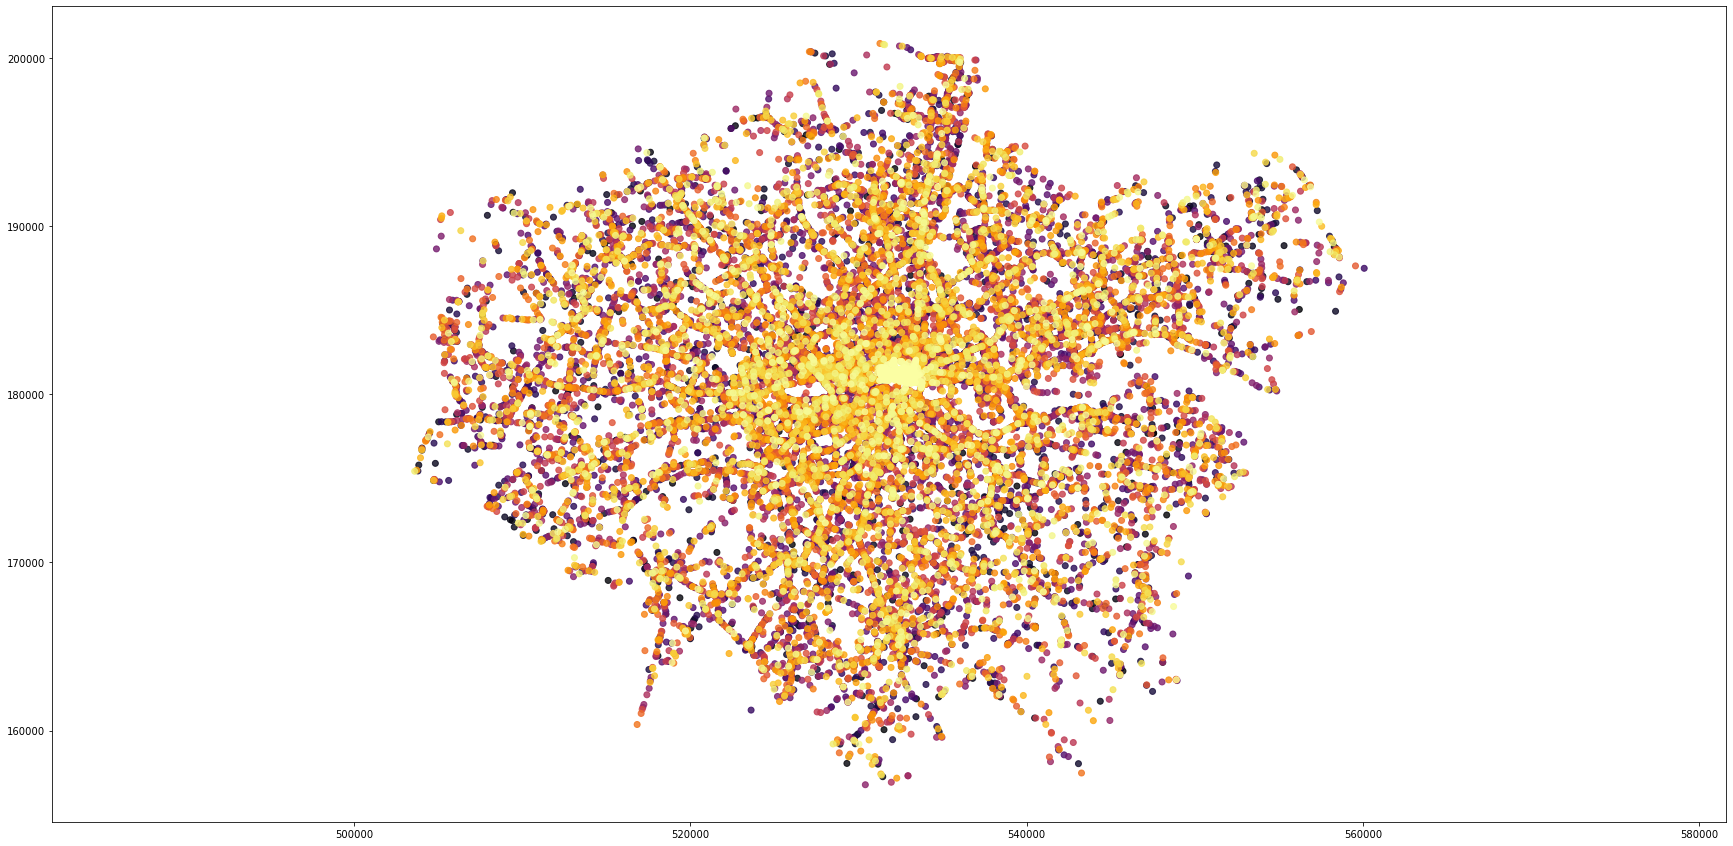

In [416]:
f, ax = plt.subplots(figsize=(30,15))

accidents_gdf.plot(ax = ax, cmap = "inferno", scheme = "fisher_jenks", k = 4, 
               legend = True, alpha = 0.8)


plt.axis("equal")

In [23]:
grouped = merged.groupby("LAD11NM").size()
grouped = grouped.to_frame().reset_index()
grouped.columns = ["LAD11NM", "accidents_count"]

In [24]:
grouped

LAD11NM  accidents_count
0     Barking and Dagenham              613
1                   Barnet              952
2                   Bexley              484
3                    Brent              864
4                  Bromley              737
5                   Camden              909
6           City of London              282
7                  Croydon              986
8                   Ealing             1010
9                  Enfield              966
10               Greenwich              740
11                 Hackney              886
12  Hammersmith and Fulham              696
13                Haringey              884
14                  Harrow              480
15                Havering              611
16              Hillingdon              705
17                Hounslow              759
18               Islington              729
19  Kensington and Chelsea              715
20    Kingston upon Thames              355
21                 Lambeth             1173
22                Lewisham              805
23                  Merton              506
24                  Newham              897
25               Redbridge              728
26    Richmond upon Thames              429
27               Southwark             1120
28                  Sutton              456
29           Tower Hamlets             1127
30          Waltham Forest              671
31              Wandsworth              968
32             Westminster             1535

In [25]:
grouped.describe()

accidents_count
count        33.000000
mean        781.151515
std         263.349355
min         282.000000
25%         613.000000
50%         740.000000
75%         952.000000
max        1535.000000

In [35]:
rds = gpd.read_file("Roads (1).gpkg", driver = "GPKG")

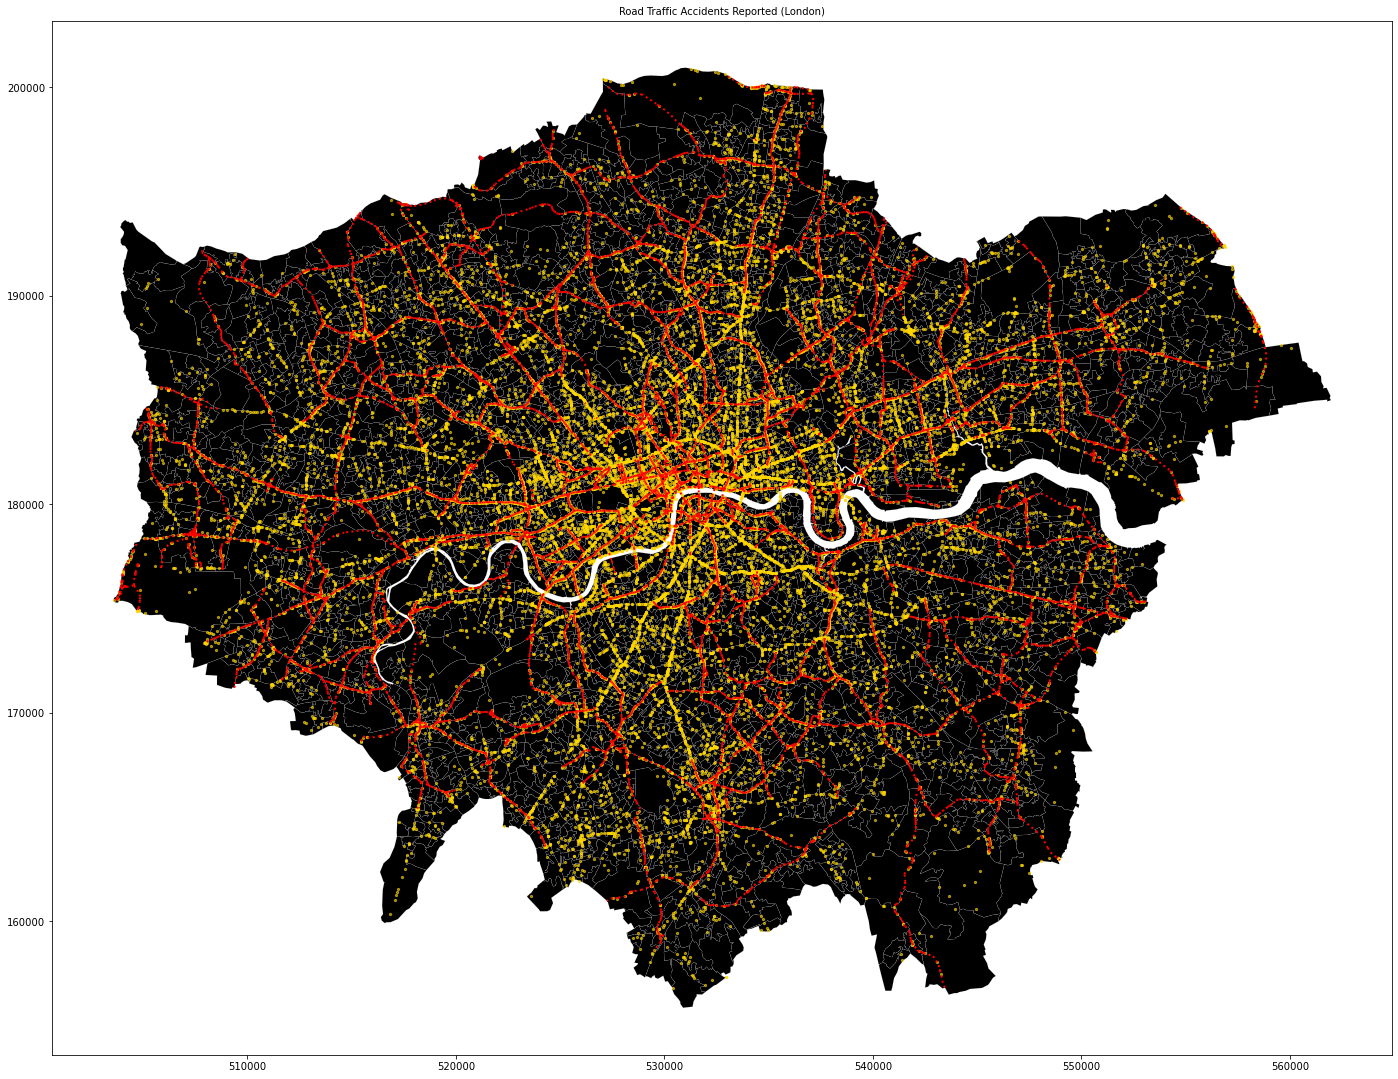

In [445]:
fig, ax = plt.subplots(figsize = (24,20))
ax.set_aspect("equal")

london_shp.plot(ax = ax, color = "black", edgecolor = "white", linewidth = 0.1)
rds.plot(ax = ax, color = "red", linewidth = 2, linestyle = ":")
accidents_gdf.plot(ax =ax, # column="Accidents_Severity", 
                   color = "gold",
                   # cmap = "inferno",
                   legend = True, markersize = 5, alpha = 0.6)
plt.title("Road Traffic Accidents Reported (London)", fontsize  = 10)
plt.savefig("count_london_gold.png",  bbox_inches = "tight")

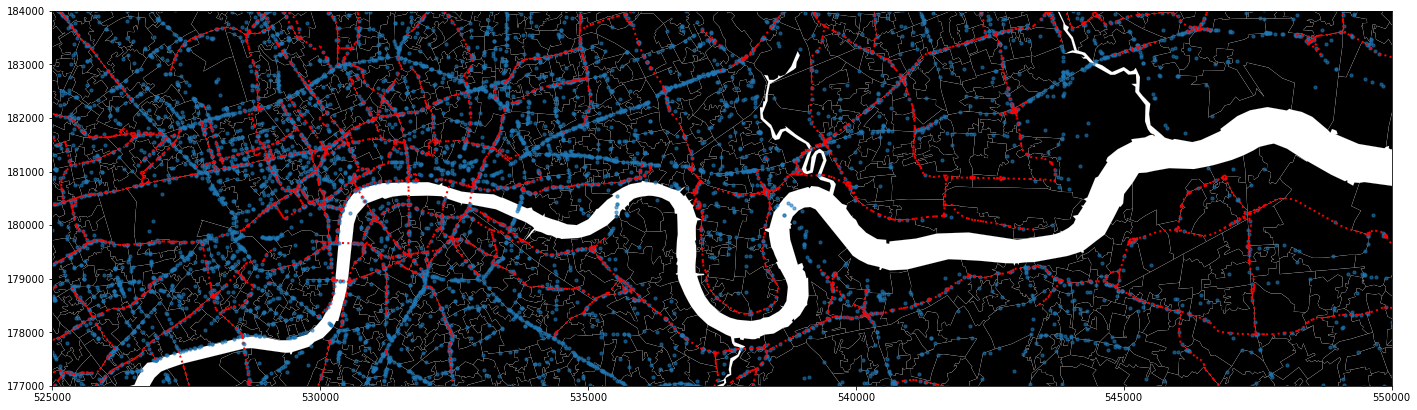

In [42]:
fig, ax1 = plt.subplots(figsize = (24,20))
ax.set_aspect("equal")

london_shp.plot(ax = ax1, color = "black", edgecolor = "white", linewidth = 0.1)
rds.plot(ax = ax1, color = "red", linewidth = 2, linestyle = ":")
accidents_gdf.plot(ax =ax1, # column="Accidents_Severity", 
                   legend = True, markersize = 10, alpha = 0.6)

ax1.set_xlim(525000,550000)

ax1.set_ylim(177000,184000)
plt.show()

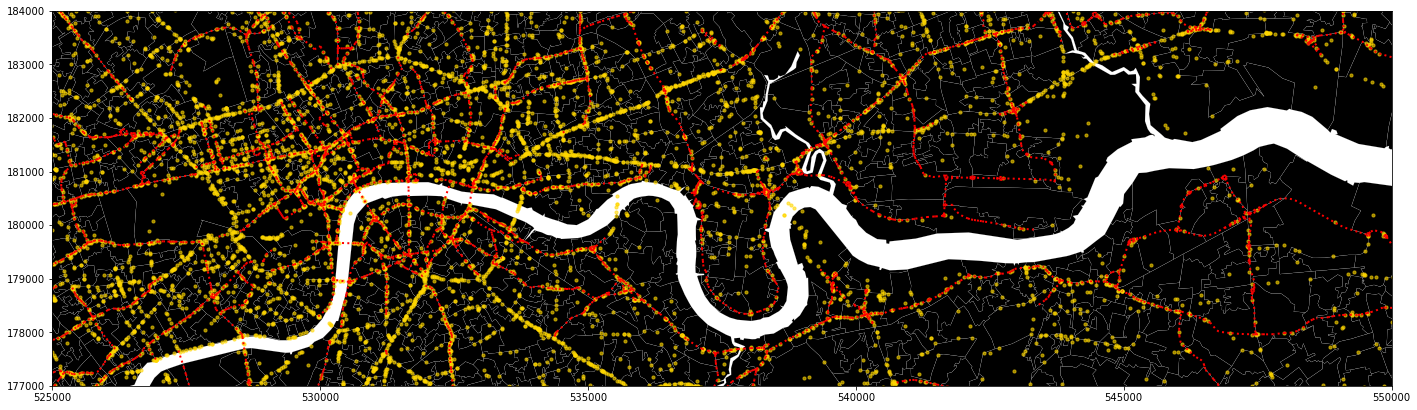

In [422]:
fig, ax1 = plt.subplots(figsize = (24,20))
ax.set_aspect("equal")

london_shp.plot(ax = ax1, color = "black", edgecolor = "white", linewidth = 0.1)
rds.plot(ax = ax1, color = "red", linewidth = 2, linestyle = ":")
accidents_gdf.plot(ax =ax1, 
                   #
                   color = "gold", # column="Accidents_Severity", 
                   #cmap = "",
                   legend = True, markersize = 10, alpha = 0.6)

ax1.set_xlim(525000,550000)

ax1.set_ylim(177000,184000)
plt.savefig("count_casestudy.png",  bbox_inches = "tight")
plt.show()

In [93]:
merged.columns.values

array(['LSOA11CD', 'LSOA11NM', 'MSOA11CD', 'MSOA11NM', 'LAD11CD',
       'LAD11NM', 'RGN11CD', 'RGN11NM', 'geometry', 'index_right',
       'Accident_Index', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date',
       'Day_of_Week', 'Time', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Urban_or_Rural_Area', 'LSOA_of_Accident_Location'], dtype=object)

In [94]:
severity = merged.groupby(["LSOA11CD"])["Accident_Severity"].min().reset_index()

In [95]:
severity.isnull().sum()

LSOA11CD               0
Accident_Severity    559
dtype: int64

In [96]:
severity = severity.dropna()

In [97]:
severity

LSOA11CD  Accident_Severity
0     E01000001                2.0
1     E01000002                2.0
2     E01000003                3.0
3     E01000005                2.0
5     E01000007                2.0
...         ...                ...
4829  E01033741                3.0
4831  E01033743                2.0
4832  E01033744                3.0
4833  E01033745                2.0
4834  E01033746                3.0

[4276 rows x 2 columns]

In [102]:
london_shp = gpd.read_file("london_lsoa.shp")

In [104]:
london_lsoa = severity.merge(london_shp, on = "LSOA11CD", how = "inner")

In [105]:
london_lsoa

LSOA11CD  Accident_Severity                   LSOA11NM   MSOA11CD  \
0     E01000001                2.0        City of London 001A  E02000001   
1     E01000002                2.0        City of London 001B  E02000001   
2     E01000003                3.0        City of London 001C  E02000001   
3     E01000005                2.0        City of London 001E  E02000001   
4     E01000007                2.0  Barking and Dagenham 015A  E02000016   
...         ...                ...                        ...        ...   
4271  E01033741                3.0             Greenwich 002G  E02000314   
4272  E01033743                2.0             Greenwich 002H  E02000314   
4273  E01033744                3.0             Greenwich 007G  E02000319   
4274  E01033745                2.0             Greenwich 002I  E02000314   
4275  E01033746                3.0             Greenwich 038E  E02006931   

                      MSOA11NM    LAD11CD               LAD11NM    RGN11CD  \
0           City of London 001  E09000001        City of London  E12000007   
1           City of London 001  E09000001        City of London  E12000007   
2           City of London 001  E09000001        City of London  E12000007   
3           City of London 001  E09000001        City of London  E12000007   
4     Barking and Dagenham 015  E09000002  Barking and Dagenham  E12000007   
...                        ...        ...                   ...        ...   
4271             Greenwich 002  E09000011             Greenwich  E12000007   
4272             Greenwich 002  E09000011             Greenwich  E12000007   
4273             Greenwich 007  E09000011             Greenwich  E12000007   
4274             Greenwich 002  E09000011             Greenwich  E12000007   
4275             Greenwich 038  E09000011             Greenwich  E12000007   

     RGN11NM                                           geometry  
0     London  POLYGON ((532105.092 182011.230, 532162.491 18...  
1     London  POLYGON ((532746.813 181786.891, 532671.688 18...  
2     London  POLYGON ((532135.145 182198.119, 532158.250 18...  
3     London  POLYGON ((533807.946 180767.770, 533649.063 18...  
4     London  POLYGON ((544180.347 184700.582, 544317.196 18...  
...      ...                                                ...  
4271  London  POLYGON ((545609.719 180288.485, 545607.333 18...  
4272  London  POLYGON ((546579.195 181097.813, 546687.036 18...  
4273  London  POLYGON ((544536.486 179447.115, 544602.630 17...  
4274  London  POLYGON ((546415.745 180152.270, 546320.715 18...  
4275  London  POLYGON ((538140.000 177313.000, 538129.177 17...  

[4276 rows x 10 columns]

In [118]:
london_shp.crs = {'init': 'epsg:4326', 'no_defs': True}
london_lsoa = gpd.GeoDataFrame(london_lsoa, crs = london_shp.crs)

In [119]:
print(london_lsoa.crs)

+init=epsg:4326 +no_defs +type=crs


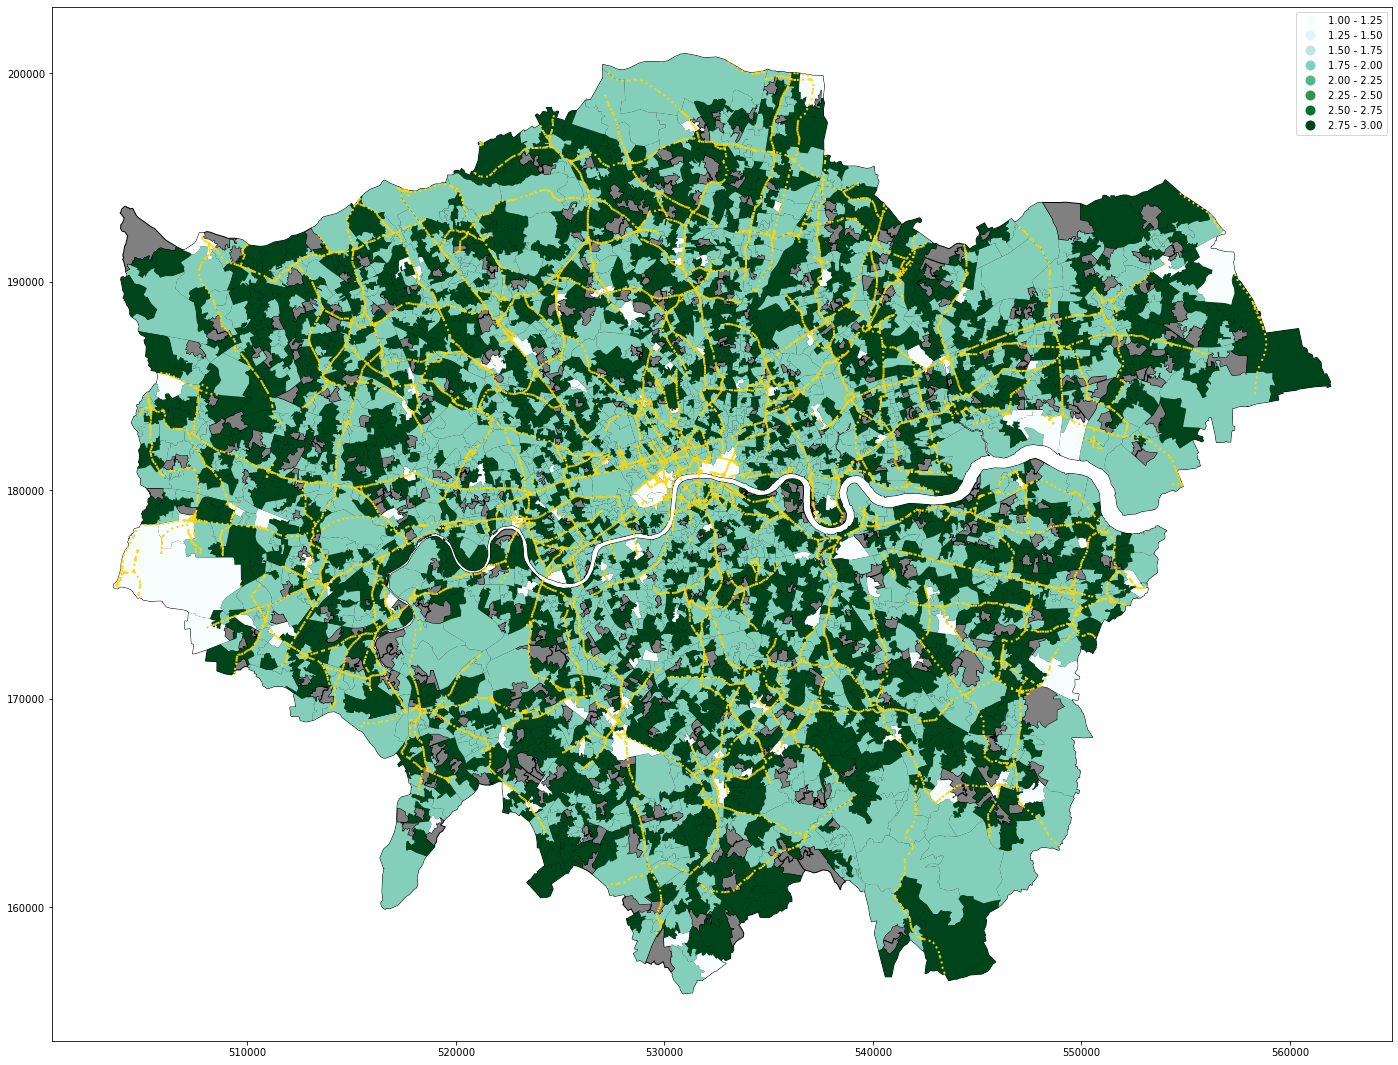

In [411]:
fig, ax = plt.subplots(figsize = (24,20))
ax.set_aspect("equal")

london_shp.plot(ax = ax, color = "grey", edgecolor = "black", linewidth = 1)
rds.plot(ax = ax, color = "gold", linewidth = 2, linestyle = ":")
london_lsoa.plot(ax =ax, column = "Accident_Severity", 
                  cmap = "BuGn", 
                 scheme = "equal_interval", k = 8,
                   legend = True, #markersize = 5, alpha = 0.6
                )
plt.savefig("severity_london.png",  bbox_inches = "tight")
plt.show()

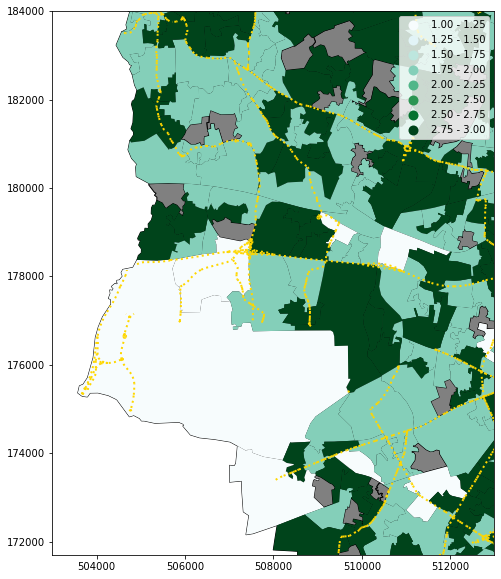

<Figure size 432x288 with 0 Axes>

In [410]:
fig, ax1 = plt.subplots(figsize = (12,10))
ax.set_aspect("equal")

london_shp.plot(ax = ax1, color = "grey", edgecolor = "black", linewidth = 1)
rds.plot(ax = ax1, color = "gold", linewidth = 2, linestyle = ":")
london_lsoa.plot(ax =ax1, column = "Accident_Severity", 
                  cmap = "BuGn", 
                 scheme = "equal_interval", k =8, 
                   legend = True, #markersize = 5, alpha = 0.6
                )
ax1.set_xlim(503000,513000)
ax1.set_ylim(171700,184000)
plt.show()
plt.savefig("severity_casestudy2.png",  bbox_inches = "tight")

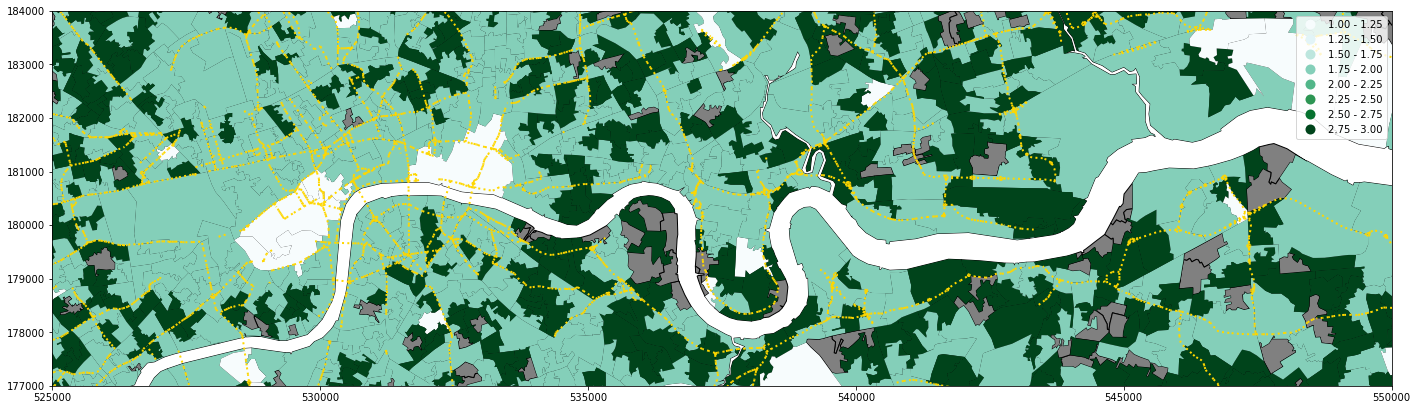

<Figure size 432x288 with 0 Axes>

In [409]:
fig, ax1 = plt.subplots(figsize = (24,20))
ax.set_aspect("equal")

london_shp.plot(ax = ax1, color = "grey", edgecolor = "black", linewidth = 1)
rds.plot(ax = ax1, color = "gold", linewidth = 2, linestyle = ":")
london_lsoa.plot(ax =ax1, column = "Accident_Severity", 
                  cmap = "BuGn", 
                 scheme = "equal_interval", k =8, 
                   legend = True, #markersize = 5, alpha = 0.6
                )
ax1.set_xlim(525000,550000)
ax1.set_ylim(177000,184000)
plt.show()
plt.savefig("severity_casestudy.png",  bbox_inches = "tight")

In [66]:
msoa_shp = london_shp = gpd.read_file("MSOA_2011_London_gen_MHW.shp")


In [154]:
msoa_shp

MSOA11CD                  MSOA11NM    LAD11CD               LAD11NM  \
0    E02000001        City of London 001  E09000001        City of London   
1    E02000002  Barking and Dagenham 001  E09000002  Barking and Dagenham   
2    E02000003  Barking and Dagenham 002  E09000002  Barking and Dagenham   
3    E02000004  Barking and Dagenham 003  E09000002  Barking and Dagenham   
4    E02000005  Barking and Dagenham 004  E09000002  Barking and Dagenham   
..         ...                       ...        ...                   ...   
978  E02006927             Greenwich 034  E09000011             Greenwich   
979  E02006928             Greenwich 035  E09000011             Greenwich   
980  E02006929             Greenwich 036  E09000011             Greenwich   
981  E02006930             Greenwich 037  E09000011             Greenwich   
982  E02006931             Greenwich 038  E09000011             Greenwich   

       RGN11CD RGN11NM  USUALRES  HHOLDRES  COMESTRES  POPDEN  HHOLDS  \
0    E12000007  London      7375      7187        188    25.5    4385   
1    E12000007  London      6775      6724         51    31.3    2713   
2    E12000007  London     10045     10033         12    46.9    3834   
3    E12000007  London      6182      5937        245    24.8    2318   
4    E12000007  London      8562      8562          0    72.1    3183   
..         ...     ...       ...       ...        ...     ...     ...   
978  E12000007  London      8315      8241         74    33.0    3338   
979  E12000007  London      7341      6410        931   136.0    2977   
980  E12000007  London      7490      7489          1    29.4    3333   
981  E12000007  London      6561      6557          4    75.6    2876   
982  E12000007  London      9186      8973        213    46.1    4113   

     AVHHOLDSZ                                           geometry  
0          1.6  MULTIPOLYGON (((531667.624 180534.992, 531647....  
1          2.5  POLYGON ((548881.563 190845.265, 548881.125 19...  
2          2.6  POLYGON ((549102.438 189324.625, 548954.500 18...  
3          2.6  POLYGON ((551549.998 187364.637, 551478.000 18...  
4          2.7  POLYGON ((549099.634 187656.076, 549161.375 18...  
..         ...                                                ...  
978        2.5  POLYGON ((541029.881 176265.023, 541101.997 17...  
979        2.2  MULTIPOLYGON (((538300.370 177956.632, 538290....  
980        2.2  POLYGON ((540054.366 179353.136, 540220.352 17...  
981        2.3  POLYGON ((539552.478 178604.042, 539533.000 17...  
982        2.2  POLYGON ((538834.754 177736.770, 538880.250 17...  

[983 rows x 13 columns]

In [450]:
msoa_shp.describe()

USUALRES      HHOLDRES    COMESTRES      POPDEN       HHOLDS  \
count    983.000000    983.000000   983.000000  983.000000   983.000000   
mean    8315.301119   8213.326551   101.974568   83.421668  3322.658189   
std     1448.361564   1448.464304   207.389350   47.997092   680.489664   
min     5184.000000   5184.000000     0.000000    2.900000  2031.000000   
25%     7337.500000   7240.500000     9.000000   47.450000  2850.000000   
50%     8156.000000   8064.000000    42.000000   72.900000  3212.000000   
75%     9110.000000   9002.000000   106.000000  115.550000  3746.500000   
max    14719.000000  14657.000000  2172.000000  247.200000  5936.000000   

        AVHHOLDSZ  
count  983.000000  
mean     2.506511  
std      0.332978  
min      1.600000  
25%      2.300000  
50%      2.500000  
75%      2.700000  
max      3.900000

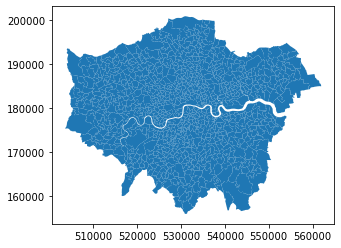

In [76]:
msoa_shp.plot()

In [155]:
severity_1 = merged.groupby(["MSOA11CD"])["Accident_Severity"].min().reset_index()

In [156]:
severity_1

MSOA11CD  Accident_Severity
0    E02000001                1.0
1    E02000002                2.0
2    E02000003                2.0
3    E02000004                2.0
4    E02000005                3.0
..         ...                ...
978  E02006927                1.0
979  E02006928                2.0
980  E02006929                2.0
981  E02006930                2.0
982  E02006931                1.0

[983 rows x 2 columns]

In [157]:
merged_msoa = severity_1.merge(msoa_shp, on = "MSOA11CD", how = "left")

In [158]:
merged_msoa = gpd.GeoDataFrame(merged_msoa)

In [159]:
merged_msoa.crs = {'init': 'epsg:4326', 'no_defs': True}

In [164]:
msoa = merged_msoa[["MSOA11CD", "MSOA11NM","Accident_Severity","geometry"]].copy()

In [165]:
msoa.to_file(driver = 'ESRI Shapefile', filename= "MSOA.shp")

In [168]:
W = ps.queen_from_shapefile("MSOA.shp")
W.transform = 'r'

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING:

In [85]:
w = ps.weights.Queen.from_dataframe(merged_msoa, idVariable="MSOA11CD" )
w.transform = "R"

('WARNING: ', 'E02000001', ' is an island (no neighbors)')
('WARNING: ', 'E02000002', ' is an island (no neighbors)')
('WARNING: ', 'E02000003', ' is an island (no neighbors)')
('WARNING: ', 'E02000004', ' is an island (no neighbors)')
('WARNING: ', 'E02000005', ' is an island (no neighbors)')
('WARNING: ', 'E02000007', ' is an island (no neighbors)')
('WARNING: ', 'E02000008', ' is an island (no neighbors)')
('WARNING: ', 'E02000009', ' is an island (no neighbors)')
('WARNING: ', 'E02000010', ' is an island (no neighbors)')
('WARNING: ', 'E02000011', ' is an island (no neighbors)')
('WARNING: ', 'E02000012', ' is an island (no neighbors)')
('WARNING: ', 'E02000013', ' is an island (no neighbors)')
('WARNING: ', 'E02000014', ' is an island (no neighbors)')
('WARNING: ', 'E02000015', ' is an island (no neighbors)')
('WARNING: ', 'E02000016', ' is an island (no neighbors)')
('WARNING: ', 'E02000017', ' is an island (no neighbors)')
('WARNING: ', 'E02000018', ' is an island (no neighbors)

In [171]:
uk_json = gpd.read_file("http://martinjc.github.io/UK-GeoJSON/json/eng/topo_lad.json")

In [175]:
uk_json

id    LAD13CD LAD13CDO               LAD13NM LAD13NMW  \
0    E06000001  E06000001     00EB            Hartlepool     None   
1    E06000002  E06000002     00EC         Middlesbrough     None   
2    E06000003  E06000003     00EE  Redcar and Cleveland     None   
3    E06000004  E06000004     00EF      Stockton-on-Tees     None   
4    E06000005  E06000005     00EH            Darlington     None   
..         ...        ...      ...                   ...      ...   
321  E09000029  E09000029     00BF                Sutton     None   
322  E09000030  E09000030     00BG         Tower Hamlets     None   
323  E09000031  E09000031     00BH        Waltham Forest     None   
324  E09000032  E09000032     00BJ            Wandsworth     None   
325  E09000033  E09000033     00BK           Westminster     None   

                                              geometry  
0    MULTIPOLYGON (((-1.24244 54.72219, -1.24162 54...  
1    MULTIPOLYGON (((-1.19744 54.58184, -1.19416 54...  
2    MULTIPOLYGON (((-1.20071 54.57768, -1.19989 54...  
3    MULTIPOLYGON (((-1.28171 54.56460, -1.27762 54...  
4    POLYGON ((-1.43800 54.59493, -1.43554 54.59552...  
..                                                 ...  
321  POLYGON ((-0.13456 51.39073, -0.13292 51.39013...  
322  POLYGON ((-0.01673 51.54356, -0.01591 51.54237...  
323  POLYGON ((0.02172 51.62861, 0.02091 51.62920, ...  
324  POLYGON ((-0.14028 51.41927, -0.14438 51.41749...  
325  POLYGON ((-0.11165 51.51561, -0.11083 51.51383...  

[326 rows x 6 columns]

In [176]:
accidents.columns.values

array(['Accident_Index', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date',
       'Day_of_Week', 'Time', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Urban_or_Rural_Area', 'LSOA_of_Accident_Location', 'geometry'],
      dtype=object)

In [188]:
uk_accidents = pd.read_csv("Road Safety Data - Accidents 2019.csv")

In [189]:
uk_accidents.isnull().sum()

Accident_Index                                    0
Location_Easting_OSGR                            28
Location_Northing_OSGR                           28
Longitude                                        28
Latitude                                         28
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                             63
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

In [190]:
# drop nans 
uk_accidents = uk_accidents.dropna()

In [191]:
uk_accidents

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0       2019010128300               528218.0                180407.0   
1       2019010152270               530219.0                172463.0   
2       2019010155191               530222.0                182543.0   
3       2019010155192               525531.0                184605.0   
4       2019010155194               524920.0                184004.0   
...               ...                    ...                     ...   
111847  201963DF02919               326180.0                316370.0   
111848  201963DF03019               309990.0                271620.0   
111849  201963DF03319               297250.0                290970.0   
111850  201963DF03419               286940.0                245670.0   
111851  201963DF03619               293850.0                225950.0   

        Longitude   Latitude  Police_Force  Accident_Severity  \
0       -0.153842  51.508057             1                  3   
1       -0.127949  51.436208             1                  3   
2       -0.124193  51.526795             1                  3   
3       -0.191044  51.546387             1                  2   
4       -0.200064  51.541121             1                  3   
...           ...        ...           ...                ...   
111847  -3.094841  52.739912            63                  1   
111848  -3.322442  52.335266            63                  1   
111849  -3.515306  52.506924            63                  1   
111850  -3.651922  52.097790            63                  1   
111851  -3.544971  51.921926            63                  1   

        Number_of_Vehicles  Number_of_Casualties        Date  ...  \
0                        2                     3  18/02/2019  ...   
1                        2                     1  15/01/2019  ...   
2                        2                     1  01/01/2019  ...   
3                        1                     1  01/01/2019  ...   
4                        2                     2  01/01/2019  ...   
...                    ...                   ...         ...  ...   
111847                   3                     2  17/08/2019  ...   
111848                   3                     2  25/08/2019  ...   
111849                   1                     1  22/09/2019  ...   
111850                   1                     2  05/10/2019  ...   
111851                   2                     1  03/11/2019  ...   

        Pedestrian_Crossing-Human_Control  \
0                                       0   
1                                      -1   
2                                       0   
3                                       0   
4                                       0   
...                                   ...   
111847                                  0   
111848                                  0   
111849                                  0   
111850                                  0   
111851                                  0   

       Pedestrian_Crossing-Physical_Facilities  Light_Conditions  \
0                                            5                 1   
1                                           -1                 4   
2                                            0                 4   
3                                            0                 4   
4                                            0                 4   
...                                        ...               ...   
111847                                       0                 1   
111848                                       0                 1   
111849                                       0                 4   
111850                                       0                 1   
111851                                       0                 1   

       Weather_Conditions  Road_Surface_Conditions  \
0                       1                        1   
1                       1                        1   
2           

In [192]:
uk_json.crs = {'init': 'epsg:4326', 'no_defs': True}

In [193]:
crs = uk_json.crs
uk_accidents_gdf = gpd.GeoDataFrame(uk_accidents, crs = crs, geometry = gpd.points_from_xy(uk_accidents.Longitude,
                                                                   uk_accidents.Latitude))
type(uk_accidents_gdf)

geopandas.geodataframe.GeoDataFrame

In [194]:
merged_uk = gpd.sjoin(uk_json, uk_accidents_gdf, how = "left")
merged_uk

id    LAD13CD LAD13CDO      LAD13NM LAD13NMW  \
0    E06000001  E06000001     00EB   Hartlepool     None   
0    E06000001  E06000001     00EB   Hartlepool     None   
0    E06000001  E06000001     00EB   Hartlepool     None   
0    E06000001  E06000001     00EB   Hartlepool     None   
0    E06000001  E06000001     00EB   Hartlepool     None   
..         ...        ...      ...          ...      ...   
325  E09000033  E09000033     00BK  Westminster     None   
325  E09000033  E09000033     00BK  Westminster     None   
325  E09000033  E09000033     00BK  Westminster     None   
325  E09000033  E09000033     00BK  Westminster     None   
325  E09000033  E09000033     00BK  Westminster     None   

                                              geometry  index_right  \
0    MULTIPOLYGON (((-1.24244 54.72219, -1.24162 54...        49407   
0    MULTIPOLYGON (((-1.24244 54.72219, -1.24162 54...        49440   
0    MULTIPOLYGON (((-1.24244 54.72219, -1.24162 54...        49410   
0    MULTIPOLYGON (((-1.24244 54.72219, -1.24162 54...        49414   
0    MULTIPOLYGON (((-1.24244 54.72219, -1.24162 54...        49385   
..                                                 ...          ...   
325  POLYGON ((-0.11165 51.51561, -0.11083 51.51383...        11785   
325  POLYGON ((-0.11165 51.51561, -0.11083 51.51383...        20966   
325  POLYGON ((-0.11165 51.51561, -0.11083 51.51383...         8221   
325  POLYGON ((-0.11165 51.51561, -0.11083 51.51383...        17124   
325  POLYGON ((-0.11165 51.51561, -0.11083 51.51383...        10502   

    Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  ...  \
0    2019170H10509               450802.0                531848.0  ...   
0    2019170H10879               450253.0                531861.0  ...   
0    2019170H10549               450323.0                532105.0  ...   
0    2019170H10589               449444.0                532195.0  ...   
0    2019170H10269               450602.0                532220.0  ...   
..             ...                    ...                     ...  ...   
325  2019010190710               528363.0                178760.0  ...   
325  2019010216758               528172.0                178828.0  ...   
325  2019010180282               528413.0                178862.0  ...   
325  2019010205744               528210.0                178857.0  ...   
325  2019010187108               528236.0                178886.0  ...   

     Pedestrian_Crossing-Human_Control  \
0                                    0   
0                                    0   
0                                    0   
0                                    0   
0                                    0   
..                                 ...   
325                                 -1   
325                                  0   
325                                  0   
325                                  0   
325                                  0   

     Pedestrian_Crossing-Physical_Facilities  Light_Conditions  \
0                                          0                 1   
0                                          0                 1   
0                                          0                 1   
0                                          5                 1   
0                                          5                 1   
..                                       ...               ...   
325                                       -1                 7   
325                                        1                 4   
325                                        0                 1   
325                                       -1                 1   
325                                        4                 7   

     Weather_Conditions  Road_Surface_Conditions  Special_Conditions_at_Site  \
0                     2                        2                           0   
0                     1                        1                           0   
0          

In [326]:
uk_severity = merged_uk.groupby(["LAD13CD"])["Accident_Severity"].mean().reset_index()

In [327]:
uk_severity.head(30)

LAD13CD  Accident_Severity
0   E06000001           2.761905
1   E06000002           2.803191
2   E06000003           2.682171
3   E06000004           2.718487
4   E06000005           2.682635
5   E06000006           2.814815
6   E06000007           2.854286
7   E06000008           2.682243
8   E06000009           2.681115
9   E06000010           2.785533
10  E06000011           2.716176
11  E06000012           2.802353
12  E06000013           2.764563
13  E06000014           2.855114
14  E06000015           2.856522
15  E06000016           2.809353
16  E06000017           2.475000
17  E06000018           2.840188
18  E06000019           2.739612
19  E06000020           2.750000
20  E06000021           2.851541
21  E06000022           2.876984
22  E06000023           2.916840
23  E06000024           2.871186
24  E06000025           2.896956
25  E06000026           2.798337
26  E06000027           2.747788
27  E06000028           2.801887
28  E06000029           2.794007
29  E06000030           2.825193

In [350]:
uk_sjoined= uk_json.merge(uk_severity, on = "LAD13CD", how = "outer")

In [351]:
uk_sjoined

id    LAD13CD LAD13CDO               LAD13NM LAD13NMW  \
0    E06000001  E06000001     00EB            Hartlepool     None   
1    E06000002  E06000002     00EC         Middlesbrough     None   
2    E06000003  E06000003     00EE  Redcar and Cleveland     None   
3    E06000004  E06000004     00EF      Stockton-on-Tees     None   
4    E06000005  E06000005     00EH            Darlington     None   
..         ...        ...      ...                   ...      ...   
321  E09000029  E09000029     00BF                Sutton     None   
322  E09000030  E09000030     00BG         Tower Hamlets     None   
323  E09000031  E09000031     00BH        Waltham Forest     None   
324  E09000032  E09000032     00BJ            Wandsworth     None   
325  E09000033  E09000033     00BK           Westminster     None   

                                              geometry  Accident_Severity  
0    MULTIPOLYGON (((-1.24244 54.72219, -1.24162 54...           2.761905  
1    MULTIPOLYGON (((-1.19744 54.58184, -1.19416 54...           2.803191  
2    MULTIPOLYGON (((-1.20071 54.57768, -1.19989 54...           2.682171  
3    MULTIPOLYGON (((-1.28171 54.56460, -1.27762 54...           2.718487  
4    POLYGON ((-1.43800 54.59493, -1.43554 54.59552...           2.682635  
..                                                 ...                ...  
321  POLYGON ((-0.13456 51.39073, -0.13292 51.39013...           2.847222  
322  POLYGON ((-0.01673 51.54356, -0.01591 51.54237...           2.857904  
323  POLYGON ((0.02172 51.62861, 0.02091 51.62920, ...           2.853211  
324  POLYGON ((-0.14028 51.41927, -0.14438 51.41749...           2.822972  
325  POLYGON ((-0.11165 51.51561, -0.11083 51.51383...           2.835302  

[326 rows x 7 columns]

In [352]:
uk_sjoined.crs = {'init': 'epsg:4326', 'no_defs': True}

In [353]:
uk_sjoined.describe()

Accident_Severity
count         326.000000
mean            2.754664
std             0.086826
min             2.000000
25%             2.709922
50%             2.762927
75%             2.814236
max             2.916840

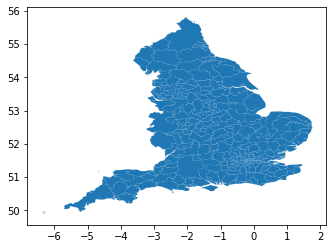

In [332]:
uk_json.plot()

In [354]:
uk_sjoined["centroid"] = uk_sjoined["geometry"].centroid

(-6.826770679210961, 2.171948644083566, 49.56743334033481, 56.10838801561512)

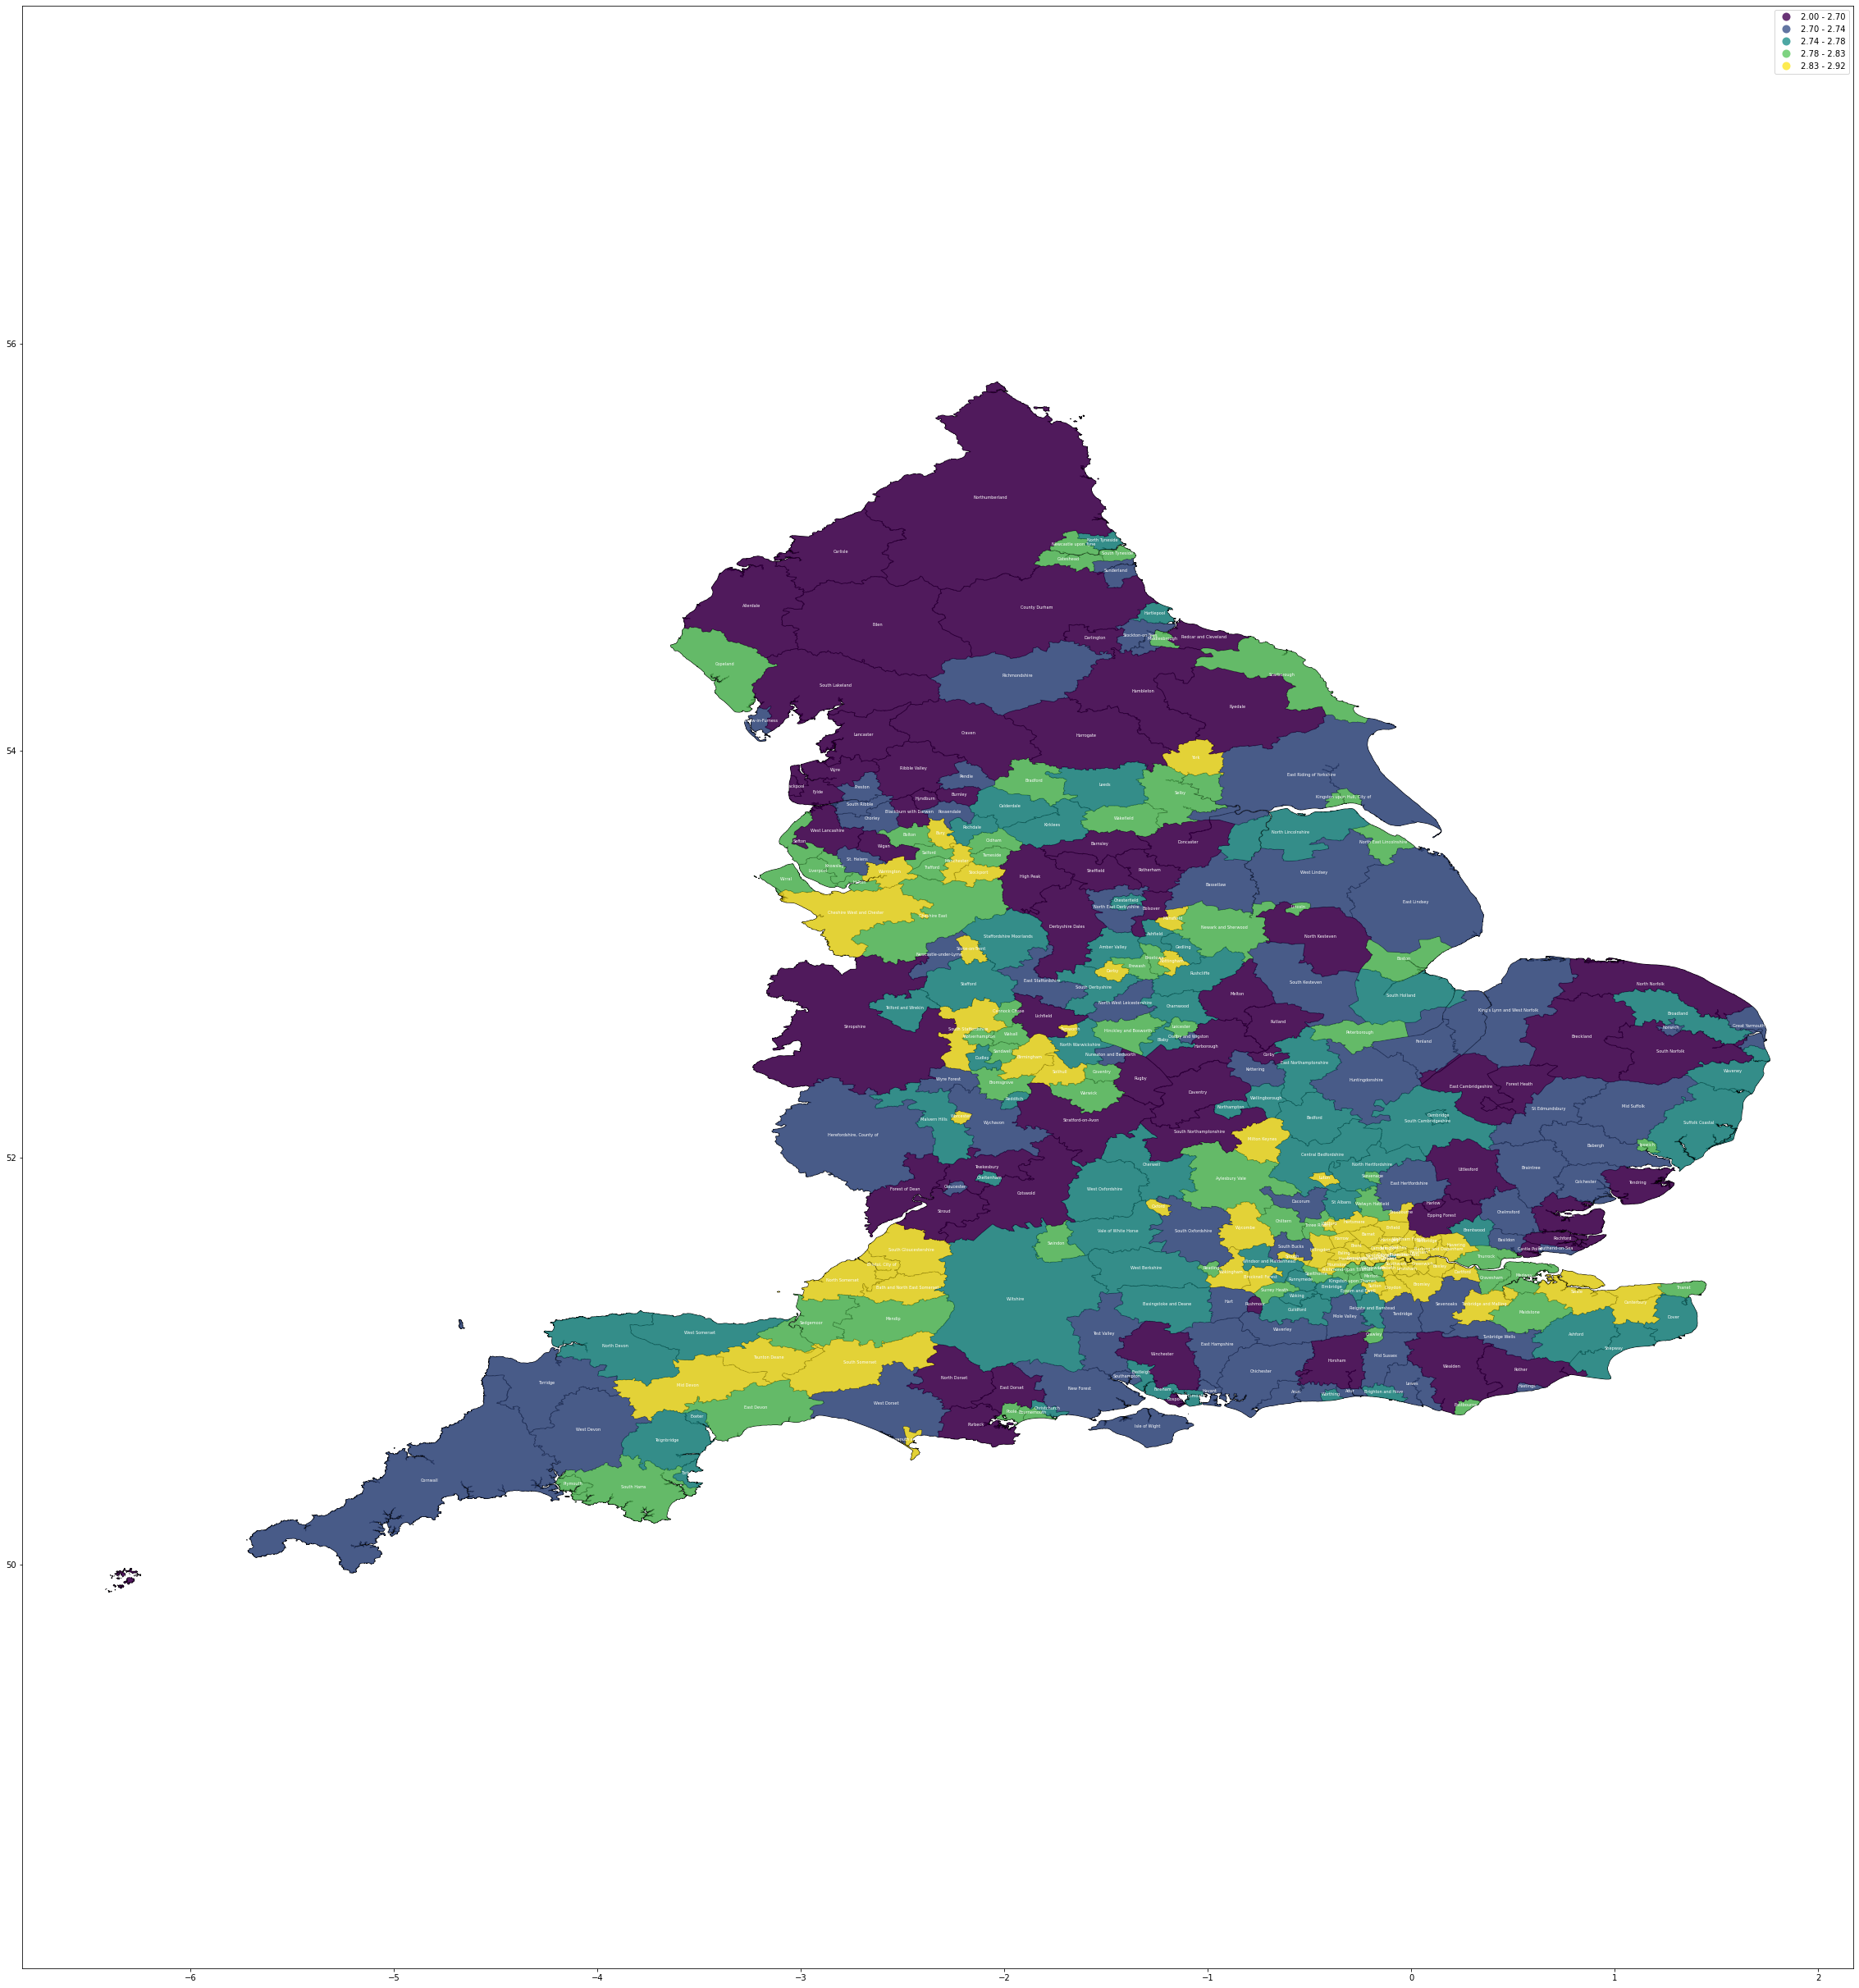

In [408]:
albers_proj = '+proj=aea +lat_1=25 +lat_2=47 +lon_0=105' 
f, ax = plt.subplots(figsize=(40,44))

uk_json.plot(ax = ax, color = "grey", edgecolor = "black", linewidth = 1)
uk_sjoined.plot(column = "Accident_Severity", ax = ax, scheme = "Quantiles",k = 5,
               #cmap = "inferno", 
                legend = True, alpha = 0.8)
for districts in uk_sjoined.iterrows():
    ax.text(districts[1]["centroid"].x, 
            districts[1]["centroid"].y, 
            districts[1]["LAD13NM"], 
            horizontalalignment= "center", 
            fontsize = 5,
            color = "white")
plt.savefig("uk_severity_mean.png",  bbox_inches = "tight")
plt.axis("equal")

In [355]:
w = ps.weights.Queen.from_dataframe(uk_sjoined, idVariable="LAD13NM" )
w.transform = "R"

('WARNING: ', 'Isle of Wight', ' is an island (no neighbors)')
('WARNING: ', 'Isles of Scilly', ' is an island (no neighbors)')


In [ ]:
uk_sjoined.to_excel(r'Path to store the exported excel file\File Name.xlsx', index = False)

In [356]:
uk_sjoined["w_severity"] = ps.weights.lag_spatial(w, uk_sjoined["Accident_Severity"])
uk_sjoined.head()

id    LAD13CD LAD13CDO               LAD13NM LAD13NMW  \
0  E06000001  E06000001     00EB            Hartlepool     None   
1  E06000002  E06000002     00EC         Middlesbrough     None   
2  E06000003  E06000003     00EE  Redcar and Cleveland     None   
3  E06000004  E06000004     00EF      Stockton-on-Tees     None   
4  E06000005  E06000005     00EH            Darlington     None   

                                            geometry  Accident_Severity  \
0  MULTIPOLYGON (((-1.24244 54.72219, -1.24162 54...           2.761905   
1  MULTIPOLYGON (((-1.19744 54.58184, -1.19416 54...           2.803191   
2  MULTIPOLYGON (((-1.20071 54.57768, -1.19989 54...           2.682171   
3  MULTIPOLYGON (((-1.28171 54.56460, -1.27762 54...           2.718487   
4  POLYGON ((-1.43800 54.59493, -1.43554 54.59552...           2.682635   

                    centroid  w_severity  
0  POINT (-1.25915 54.66937)    2.695250  
1  POINT (-1.22228 54.54204)    2.686295  
2  POINT (-1.02061 54.55160)    2.754248  
3  POINT (-1.33214 54.56184)    2.715594  
4  POINT (-1.55268 54.54875)    2.688202

In [359]:
import openpyxl

In [360]:
uk_sjoined.to_excel('moran.xlsx', index = False)

In [344]:
uk_sjoined.describe()

Accident_Severity  w_severity
count         326.000000  326.000000
mean            2.754664    2.731739
std             0.086826    0.221729
min             2.000000    0.000000
25%             2.709922    2.711355
50%             2.762927    2.748211
75%             2.814236    2.782825
max             2.916840    2.881709

In [345]:
uk_sjoined.replace(0,np.nan)

id    LAD13CD LAD13CDO               LAD13NM LAD13NMW  \
0    E06000001  E06000001     00EB            Hartlepool     None   
1    E06000002  E06000002     00EC         Middlesbrough     None   
2    E06000003  E06000003     00EE  Redcar and Cleveland     None   
3    E06000004  E06000004     00EF      Stockton-on-Tees     None   
4    E06000005  E06000005     00EH            Darlington     None   
..         ...        ...      ...                   ...      ...   
321  E09000029  E09000029     00BF                Sutton     None   
322  E09000030  E09000030     00BG         Tower Hamlets     None   
323  E09000031  E09000031     00BH        Waltham Forest     None   
324  E09000032  E09000032     00BJ            Wandsworth     None   
325  E09000033  E09000033     00BK           Westminster     None   

                                              geometry  Accident_Severity  \
0    MULTIPOLYGON (((-1.24244 54.72219, -1.24162 54...           2.761905   
1    MULTIPOLYGON (((-1.19744 54.58184, -1.19416 54...           2.803191   
2    MULTIPOLYGON (((-1.20071 54.57768, -1.19989 54...           2.682171   
3    MULTIPOLYGON (((-1.28171 54.56460, -1.27762 54...           2.718487   
4    POLYGON ((-1.43800 54.59493, -1.43554 54.59552...           2.682635   
..                                                 ...                ...   
321  POLYGON ((-0.13456 51.39073, -0.13292 51.39013...           2.847222   
322  POLYGON ((-0.01673 51.54356, -0.01591 51.54237...           2.857904   
323  POLYGON ((0.02172 51.62861, 0.02091 51.62920, ...           2.853211   
324  POLYGON ((-0.14028 51.41927, -0.14438 51.41749...           2.822972   
325  POLYGON ((-0.11165 51.51561, -0.11083 51.51383...           2.835302   

                      centroid  w_severity  
0    POINT (-1.25915 54.66937)    2.695250  
1    POINT (-1.22228 54.54204)    2.686295  
2    POINT (-1.02061 54.55160)    2.754248  
3    POINT (-1.33214 54.56184)    2.715594  
4    POINT (-1.55268 54.54875)    2.688202  
..                         ...         ...  
321  POINT (-0.17766 51.36214)    2.796167  
322  POINT (-0.03560 51.51722)    2.816954  
323  POINT (-0.01256 51.59411)    2.823830  
324  POINT (-0.18636 51.45133)    2.820225  
325  POINT (-0.16127 51.51396)    2.829505  

[326 rows x 9 columns]

In [315]:
uk_sjoined[uk_sjoined["LAD13NM"] == 'Isle of Wight']["w_severity"]

45    0.0
Name: w_severity, dtype: float64

In [324]:
uk_sjoined.describe()

count    1.0
mean     2.7
std      NaN
min      2.7
25%      2.7
50%      2.7
75%      2.7
max      2.7
Name: w_severity, dtype: float64

In [297]:
import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster
from esda.moran import Moran, Moran_Local

In [389]:
uk_sjoined_severity_cleaned = pd.read_csv("moran_cleaned.csv")

In [363]:
y = uk_sjoined_severity_cleaned["w_severity"]
moran = Moran(y, w)
moran.I

0.7236316077830212

In [364]:
moran.p_sim

0.001

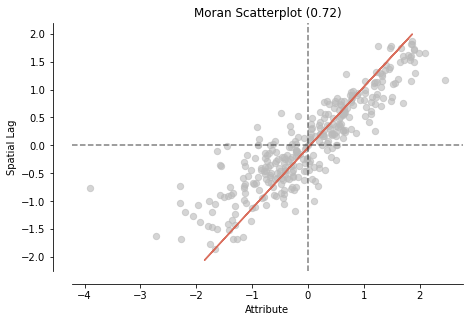

In [407]:
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.savefig("uk_accidents_severity_scattermoran.png",  bbox_inches = "tight")
plt.show()

In [366]:
m_local = Moran_Local(y, w)

In [375]:
print(m_local)

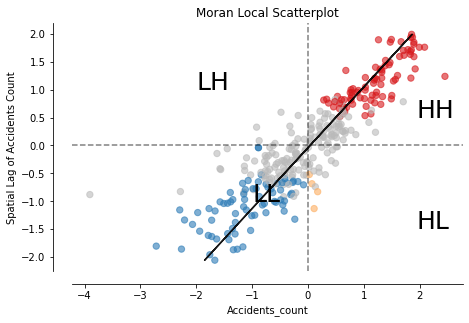

<Figure size 432x288 with 0 Axes>

In [417]:
fig, ax = moran_scatterplot(m_local, p=0.1)
ax.set_xlabel('Accidents_count')
ax.set_ylabel('Spatial Lag of Accidents Count')
plt.text(1.95, 0.5, "HH", fontsize=25)
plt.text(1.95, -1.5, "HL", fontsize=25)
plt.text(-2, 1, "LH", fontsize=25)
plt.text(-1, -1, "LL", fontsize=25)
plt.show()
plt.savefig("uk_accidents_severity_colored.png",  bbox_inches = "tight")

In [380]:
uk_sjoined_severity_cleaned

id    LAD13CD LAD13CDO               LAD13NM  LAD13NMW  \
0    E06000001  E06000001     00EB            Hartlepool       NaN   
1    E06000002  E06000002     00EC         Middlesbrough       NaN   
2    E06000003  E06000003     00EE  Redcar and Cleveland       NaN   
3    E06000004  E06000004     00EF      Stockton-on-Tees       NaN   
4    E06000005  E06000005     00EH            Darlington       NaN   
..         ...        ...      ...                   ...       ...   
321  E09000029  E09000029     00BF                Sutton       NaN   
322  E09000030  E09000030     00BG         Tower Hamlets       NaN   
323  E09000031  E09000031     00BH        Waltham Forest       NaN   
324  E09000032  E09000032     00BJ            Wandsworth       NaN   
325  E09000033  E09000033     00BK           Westminster       NaN   

                                              geometry  Accident_Severity  \
0    MULTIPOLYGON (((-1.242439312069096 54.72219136...           2.761905   
1    MULTIPOLYGON (((-1.197436714933196 54.58184412...           2.803191   
2    MULTIPOLYGON (((-1.200709631088534 54.57768128...           2.682171   
3    MULTIPOLYGON (((-1.281714305933154 54.56459806...           2.718487   
4    POLYGON ((-1.437996052350552 54.59492734219735...           2.682635   
..                                                 ...                ...   
321  POLYGON ((-0.1345571934871259 51.3907283959017...           2.847222   
322  POLYGON ((-0.01673221189495244 51.543564165983...           2.857904   
323  POLYGON ((0.0217245529302712 51.62860508085321...           2.853211   
324  POLYGON ((-0.1402847967589675 51.4192735980959...           2.822972   
325  POLYGON ((-0.1116467803997585 51.5156136555012...           2.835302   

                                          centroid  w_severity  
0     POINT (-1.259149254553271 54.66937182425491)    2.695250  
1      POINT (-1.22228363446144 54.54203637620871)    2.686295  
2     POINT (-1.020610929751027 54.55159921967805)    2.754248  
3     POINT (-1.332138047418641 54.56183889569884)    2.715594  
4     POINT (-1.552676740857847 54.54874528418866)    2.688202  
..                                             ...         ...  
321  POINT (-0.1776601954723623 51.36214005081098)    2.796167  
322  POINT (-0.03560493389138728 51.5172180488392)    2.816954  
323  POINT (-0.01256155232135985 51.5941085587511)    2.823830  
324  POINT (-0.1863592158415978 51.45132755539221)    2.820225  
325  POINT (-0.1612672992866376 51.51396006322219)    2.829505  

[326 rows x 9 columns]

In [377]:
uk_sjoined_severity_cleaned = gpd.GeoDataFrame(uk_sjoined_severity_cleaned)

In [ ]:
for districts in uk_sjoined_severity_cleaned.iterrows():
    ax.text(districts[1]["centroid"].x, 
            districts[1]["centroid"].y, 
            districts[1]["LAD13NM"], 
            horizontalalignment= "center", 
            fontsize = 15,
            color = "white")

In [383]:
from shapely.wkt import loads

In [385]:
uk_sjoined_severity_cleaned.geometry

0      MULTIPOLYGON (((-1.242439312069096 54.72219136...
1      MULTIPOLYGON (((-1.197436714933196 54.58184412...
2      MULTIPOLYGON (((-1.200709631088534 54.57768128...
3      MULTIPOLYGON (((-1.281714305933154 54.56459806...
4      POLYGON ((-1.437996052350552 54.59492734219735...
                             ...                        
321    POLYGON ((-0.1345571934871259 51.3907283959017...
322    POLYGON ((-0.01673221189495244 51.543564165983...
323    POLYGON ((0.0217245529302712 51.62860508085321...
324    POLYGON ((-0.1402847967589675 51.4192735980959...
325    POLYGON ((-0.1116467803997585 51.5156136555012...
Name: geometry, Length: 326, dtype: object

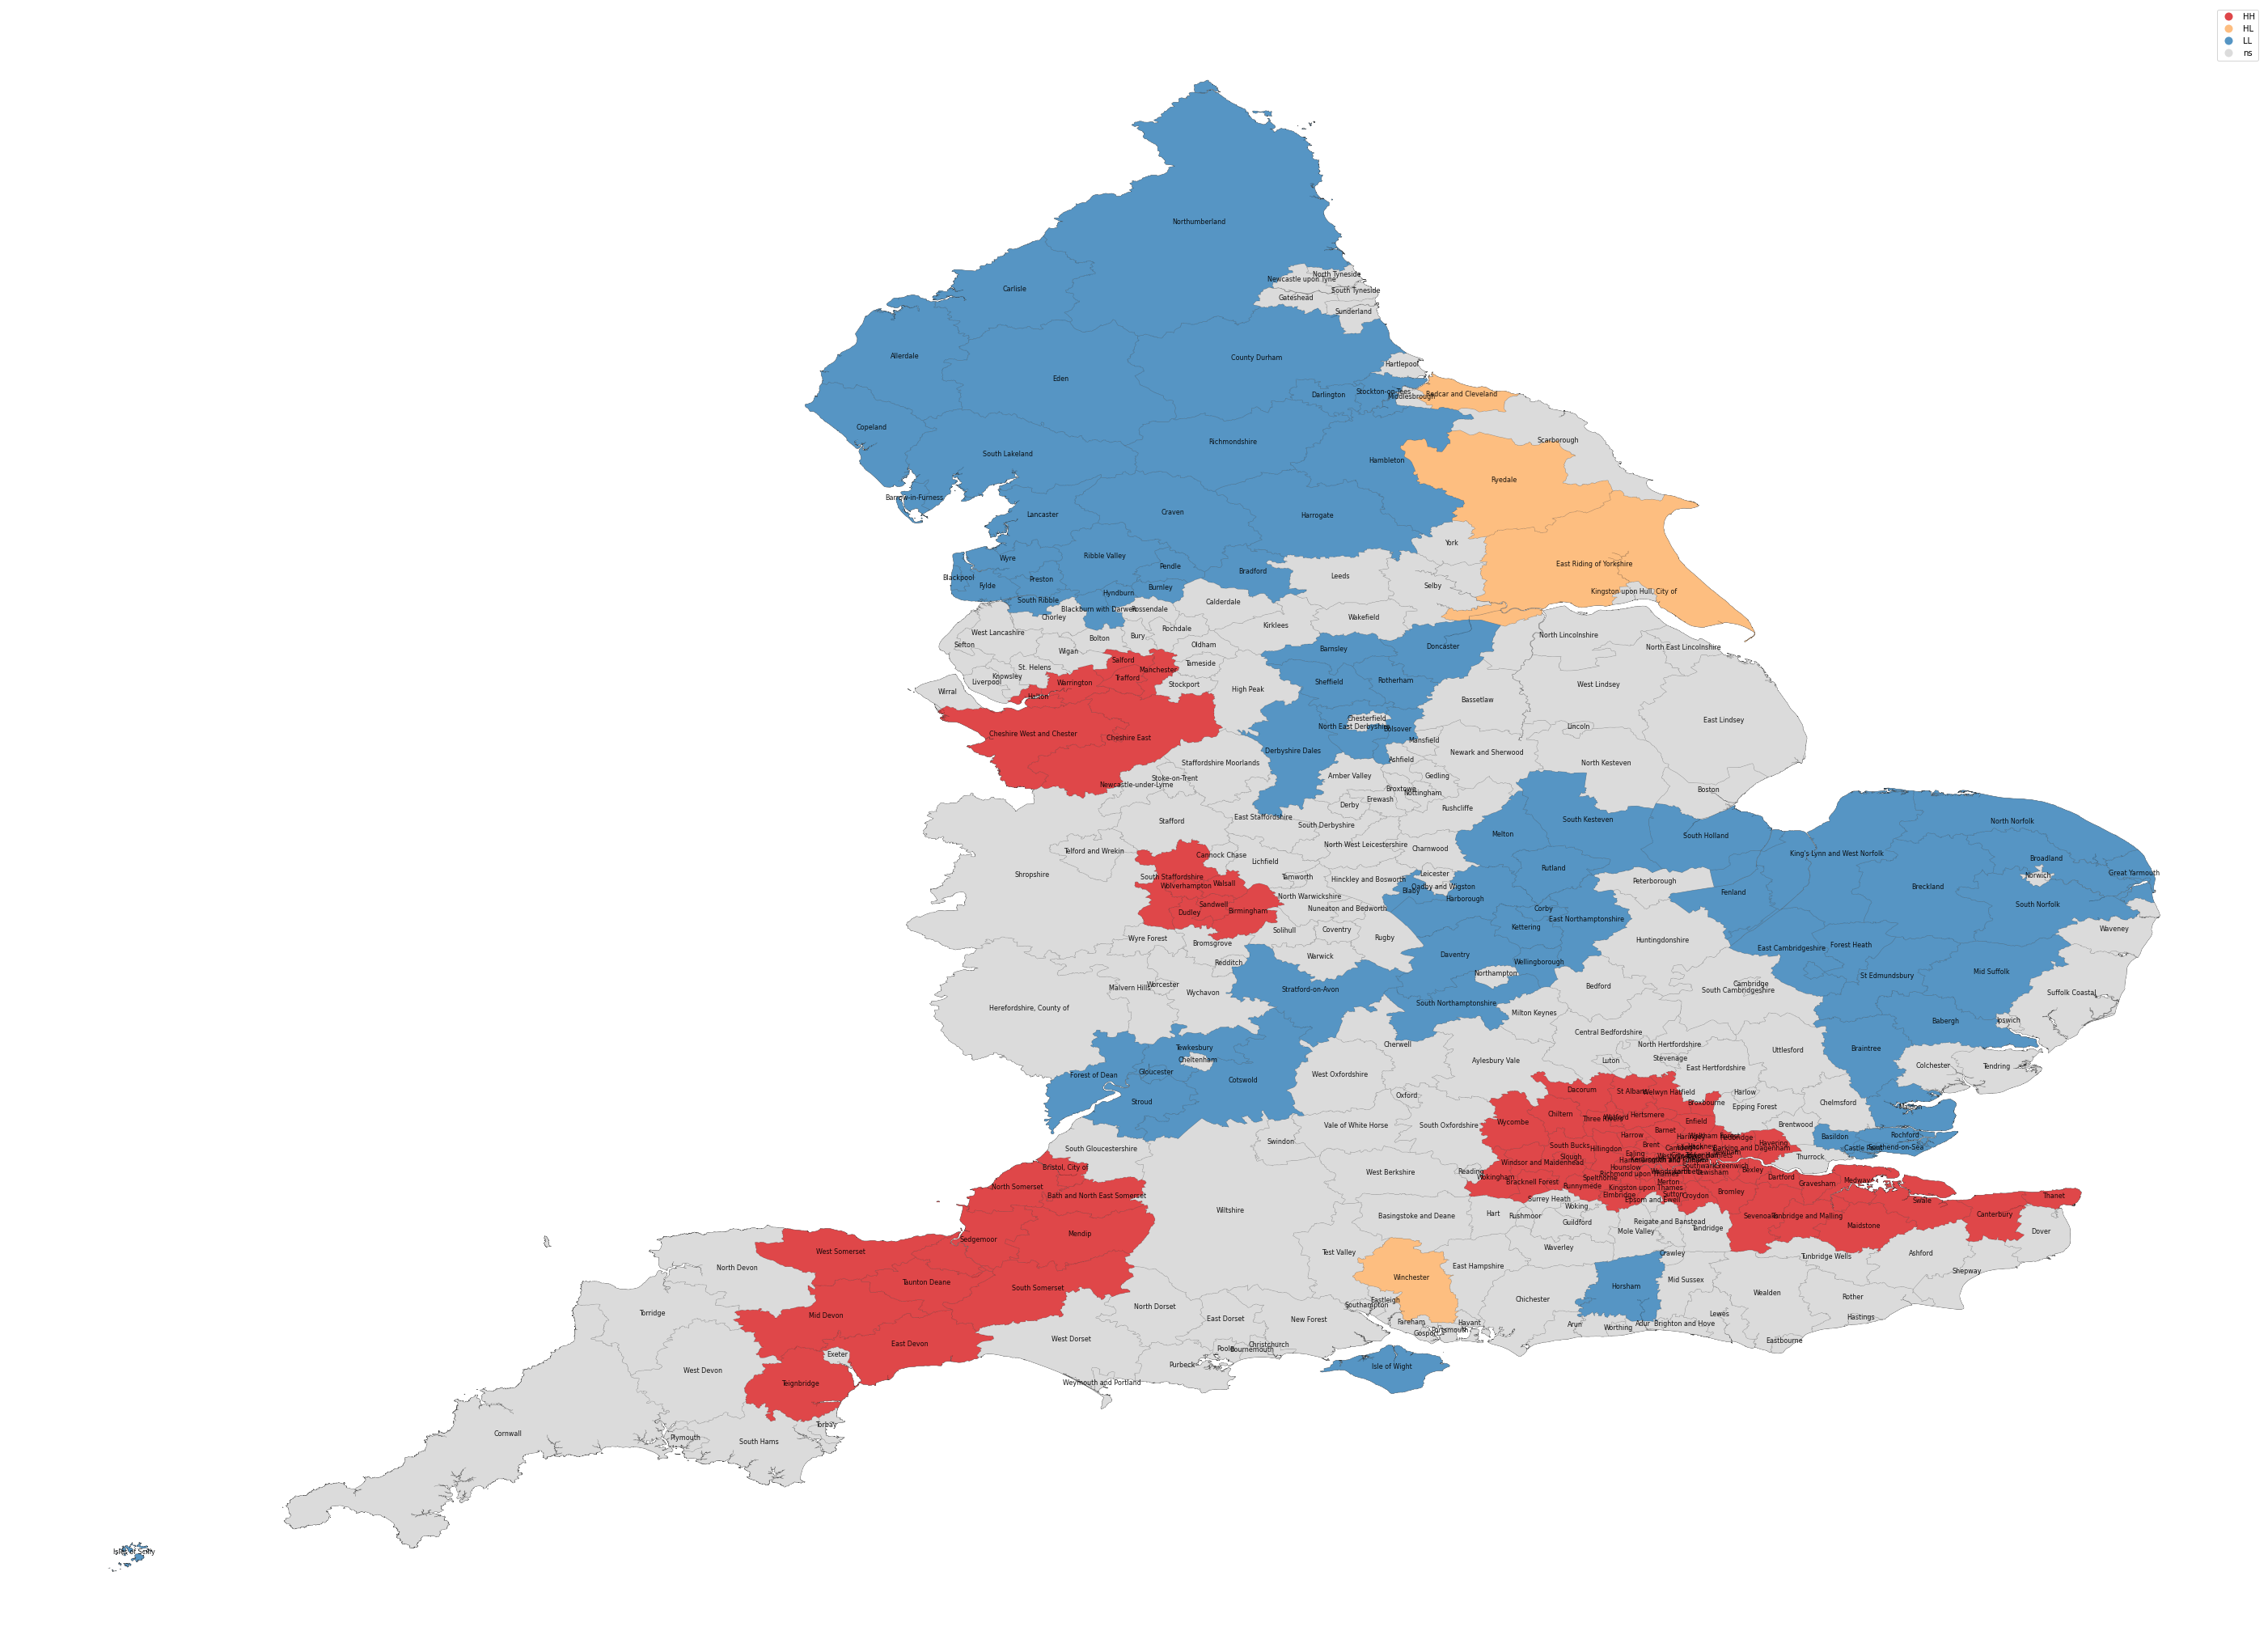

In [449]:
fig, ax = plt.subplots(figsize=(50,44))
uk_json.plot(ax = ax, color = "white", edgecolor = "black", linewidth = 0.5)
lisa_cluster(m_local, uk_sjoined, p=0.1, ax=ax, alpha = 0.8)
for districts in uk_sjoined.iterrows():
    ax.text(districts[1]["centroid"].x, 
            districts[1]["centroid"].y, 
            districts[1]["LAD13NM"], 
            horizontalalignment= "center", 
            fontsize = 8, alpha = 0.9,
            color = "black")
plt.savefig("uk_lisa_final.png", bbox_inches = "tight")

In [423]:
accidents.head()

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0    2.019010e+12                 528218                  180407   
1    2.019010e+12                 530219                  172463   
2    2.019010e+12                 530222                  182543   
3    2.019010e+12                 525531                  184605   
4    2.019010e+12                 524920                  184004   

   Accident_Severity  Number_of_Vehicles  Number_of_Casualties        Date  \
0                  3                   2                     3  18/02/2019   
1                  3                   2                     1  15/01/2019   
2                  3                   2                     1  01/01/2019   
3                  2                   1                     1  01/01/2019   
4                  3                   2                     2  01/01/2019   

   Day_of_Week   Time Local_Authority_(Highway)  ...  2nd_Road_Class  \
0            2  17:50                 E09000033  ...               3   
1            3  21:45                 E09000022  ...              -1   
2            3   1:50                 E09000007  ...               6   
3            3   1:20                 E09000007  ...               4   
4            3   0:40                 E09000005  ...               6   

   2nd_Road_Number  Pedestrian_Crossing-Human_Control  \
0             4202                                  0   
1                0                                 -1   
2                0                                  0   
3              510                                  0   
4                0                                  0   

   Pedestrian_Crossing-Physical_Facilities  Light_Conditions  \
0                                        5                 1   
1                                       -1                 4   
2                                        0                 4   
3                                        0                 4   
4                                        0                 4   

   Weather_Conditions  Road_Surface_Conditions  Urban_or_Rural_Area  \
0                   1                        1                    1   
1                   1                        1                    1   
2                   1                        1                    1   
3                   1                        1                    1   
4                   1                        1                    1   

   LSOA_of_Accident_Location                       geometry  
0                  E01004762  POINT (528218.000 180407.000)  
1                  E01003117  POINT (530219.000 172463.000)  
2                  E01000943  POINT (530222.000 182543.000)  
3                  E01000973  POINT (525531.000 184605.000)  
4                  E01000546  POINT (524920.000 184004.000)  

[5 rows x 26 columns]

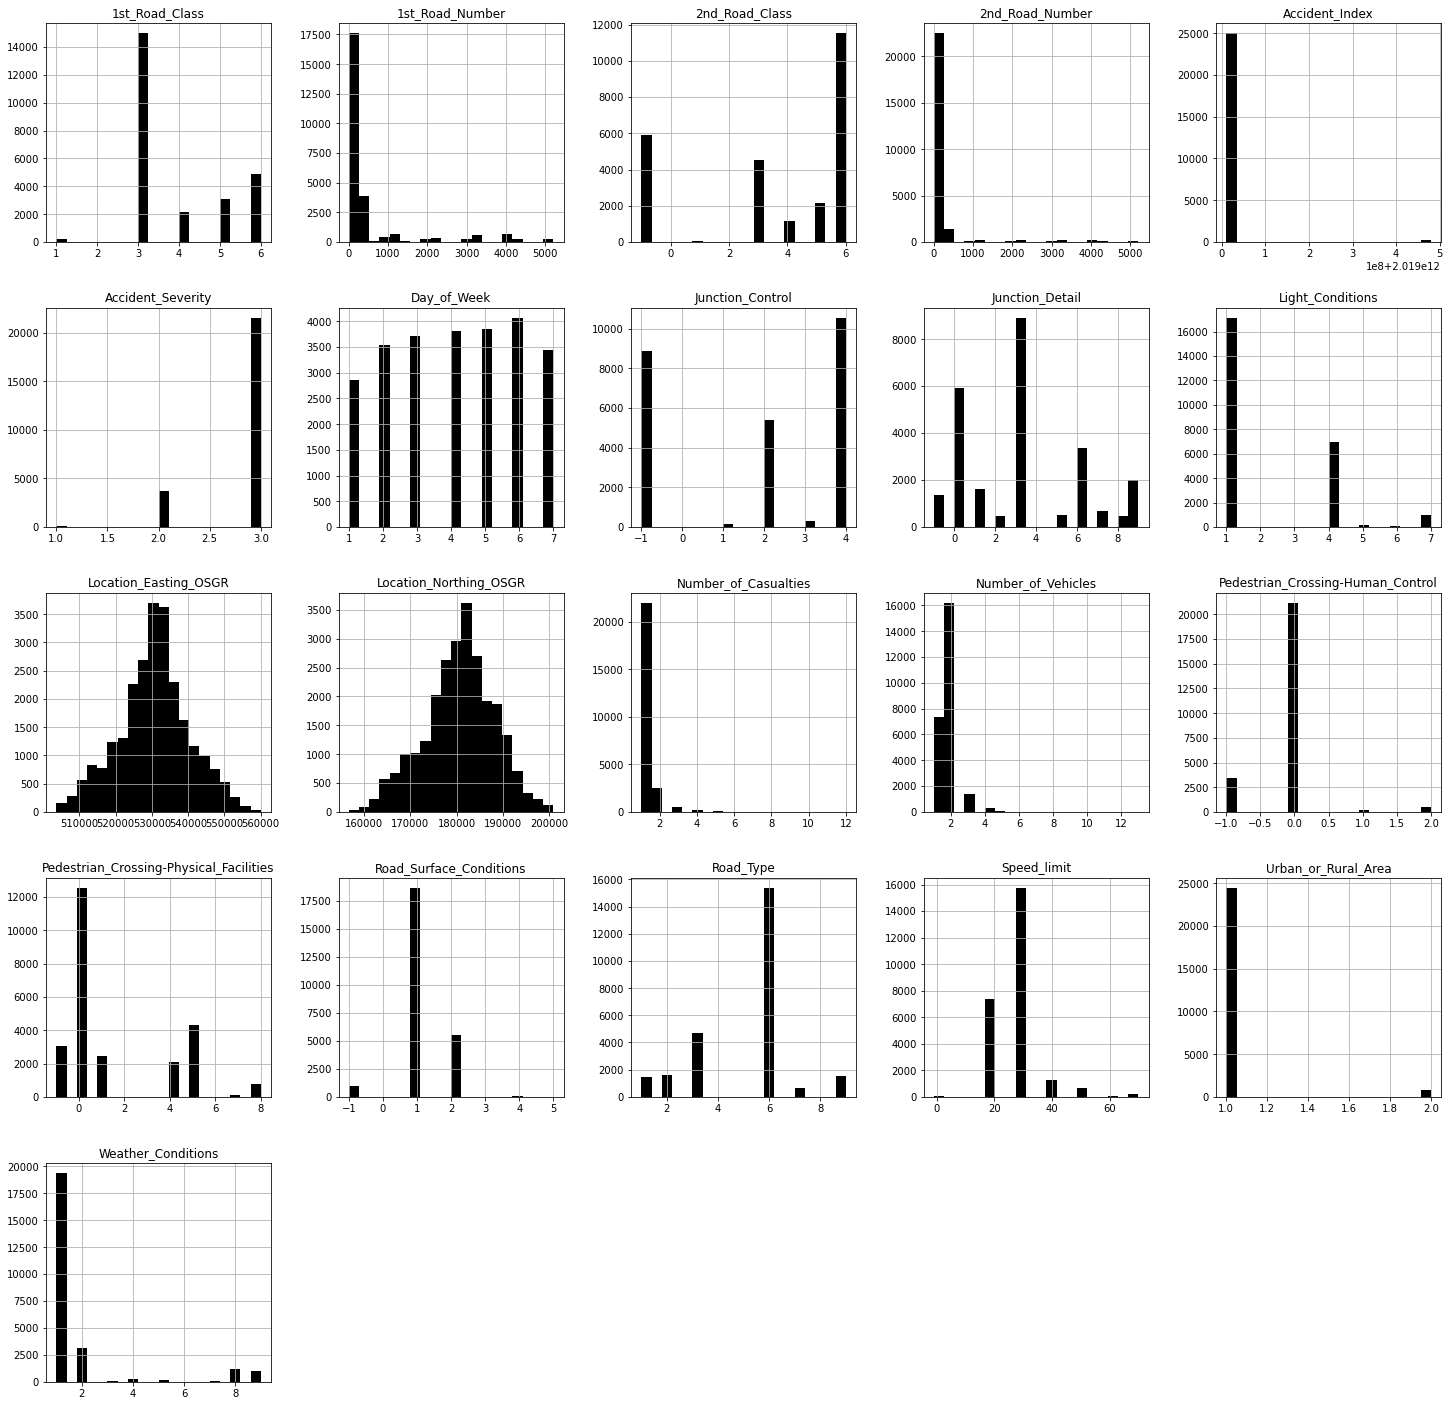

In [426]:
accidents.hist(bins = 20, figsize = (25,25), color = "black")
plt.savefig("hist.png", bbox_inches = "tight")
plt.show()

In [427]:
accidents.columns.values

array(['Accident_Index', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date',
       'Day_of_Week', 'Time', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Urban_or_Rural_Area', 'LSOA_of_Accident_Location', 'geometry'],
      dtype=object)

In [429]:
from pandas.plotting import scatter_matrix

In [435]:
vehicles = pd.read_csv("vehicles_cleaned_2019.csv")

In [436]:
vehicles.head()

Accident_Index  Vehicle_Reference  Vehicle_Type  Towing_and_Articulation  \
0    2.01901e+12                  1             9                        0   
1    2.01901e+12                  2             9                        0   
2    2.01901e+12                  1             9                        0   
3    2.01901e+12                  2             9                        0   
4    2.01901e+12                  1             9                        0   

   Vehicle_Manoeuvre  Vehicle_Location-Restricted_Lane  Junction_Location  \
0                 -1                                -1                 -1   
1                 -1                                -1                 -1   
2                 18                                -1                  0   
3                 18                                -1                  0   
4                  3                                 0                  1   

   Skidding_and_Overturning  Hit_Object_in_Carriageway  \
0                        -1                         -1   
1                        -1                         -1   
2                        -1                         -1   
3                        -1                         -1   
4                         0                          0   

   Vehicle_Leaving_Carriageway  Hit_Object_off_Carriageway  \
0                           -1                          -1   
1                           -1                          -1   
2                           -1                          -1   
3                           -1                          -1   
4                            0                           0   

   1st_Point_of_Impact  Was_Vehicle_Left_Hand_Drive?  \
0                    4                            -1   
1                   -1                            -1   
2                    1                            -1   
3                   -1                            -1   
4                    2                             1   

   Journey_Purpose_of_Driver  Sex_of_Driver  Age_Band_of_Driver  \
0                          6              1                   9   
1                          6              3                  -1   
2                          6              2                   5   
3                          6              3                  -1   
4                          6              1                   7   

   Age_of_Vehicle  Driver_IMD_Decile  Vehicle_IMD_Decile  
0              -1                  2                   2  
1              -1                  2                   2  
2              -1                  3                   3  
3              -1                  6                   6  
4              -1                  4                   4

In [438]:
vehicles

Accident_Index  Vehicle_Reference  Vehicle_Type  \
0         2.01901e+12                  1             9   
1         2.01901e+12                  2             9   
2         2.01901e+12                  1             9   
3         2.01901e+12                  2             9   
4         2.01901e+12                  1             9   
...               ...                ...           ...   
216376    2.01998E+12                  4            19   
216377    2.01998E+12                  1             9   
216378    2.01998E+12                  2             9   
216379    2.01998E+12                  1             9   
216380  201998QC01004                  1             5   

        Towing_and_Articulation  Vehicle_Manoeuvre  \
0                             0                 -1   
1                             0                 -1   
2                             0                 18   
3                             0                 18   
4                             0                  3   
...                         ...                ...   
216376                        0                 18   
216377                        0                 18   
216378                        0                 18   
216379                        0                  7   
216380                        0                 16   

        Vehicle_Location-Restricted_Lane  Junction_Location  \
0                                     -1                 -1   
1                                     -1                 -1   
2                                     -1                  0   
3                                     -1                  0   
4                                      0                  1   
...                                  ...                ...   
216376                                 0                  0   
216377                                 0                  1   
216378                                 0                  1   
216379                                 0                  6   
216380                                 0                  0   

        Skidding_and_Overturning  Hit_Object_in_Carriageway  \
0                             -1                         -1   
1                             -1                         -1   
2                             -1                         -1   
3                             -1                         -1   
4                              0                          0   
...                          ...                        ...   
216376                         0                          0   
216377                         0                          0   
216378                         0                          0   
216379                         0                          0   
216380                         0                          0   

        Vehicle_Leaving_Carriageway  Hit_Object_off_Carriageway  \
0                                -1                          -1   
1                                -1                          -1   
2                                -1                          -1   
3                                -1                          -1   
4                                 0                           0   
...                             ...                         ...   
216376                            0                           0   
216377                            0                           0   
216378                            0                           0   
216379                            3                           0   
216380                            1                           0   

        1st_Point_of_Impact  Was_Vehicle_Left_Hand_Drive?  \
0                         4                            -1   
1                        -1                            -1   
2                         1                            -1   
3                        -1                            -1   
4                         2          

In [439]:
accidents

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0        2.019010e+12                 528218                  180407   
1        2.019010e+12                 530219                  172463   
2        2.019010e+12                 530222                  182543   
3        2.019010e+12                 525531                  184605   
4        2.019010e+12                 524920                  184004   
...               ...                    ...                     ...   
25305    2.019480e+12                 532815                  181184   
25306    2.019480e+12                 533246                  181528   
25307    2.019480e+12                 531454                  180831   
25308    2.019480e+12                 532251                  181025   
25309    2.019480e+12                 531608                  181342   

       Accident_Severity  Number_of_Vehicles  Number_of_Casualties  \
0                      3                   2                     3   
1                      3                   2                     1   
2                      3                   2                     1   
3                      2                   1                     1   
4                      3                   2                     2   
...                  ...                 ...                   ...   
25305                  3                   1                     1   
25306                  3                   1                     1   
25307                  3                   2                     1   
25308                  3                   2                     1   
25309                  2                   2                     2   

             Date  Day_of_Week   Time Local_Authority_(Highway)  ...  \
0      18/02/2019            2  17:50                 E09000033  ...   
1      15/01/2019            3  21:45                 E09000022  ...   
2      01/01/2019            3   1:50                 E09000007  ...   
3      01/01/2019            3   1:20                 E09000007  ...   
4      01/01/2019            3   0:40                 E09000005  ...   
...           ...          ...    ...                       ...  ...   
25305  17/10/2019            5  22:15                 E09000001  ...   
25306  24/10/2019            5  18:10                 E09000001  ...   
25307  06/12/2019            6  18:30                 E09000001  ...   
25308  12/12/2019            5  15:23                 E09000001  ...   
25309  17/12/2019            3  20:58                 E09000001  ...   

       2nd_Road_Class  2nd_Road_Number  Pedestrian_Crossing-Human_Control  \
0                   3             4202                                  0   
1                  -1                0                                 -1   
2                   6                0                                  0   
3                   4              510                                  0   
4                   6                0                                  0   
...               ...              ...                                ...   
25305               6                0                                  0   
25306               6                0                                  0   
25307               6                0                                  0   
25308               6                0                                  0   
25309              -1                0                                  0   

       Pedestrian_Crossing-Physical_Facilities  Light_Conditions  \
0                                            5                 1   
1                                           -1                 4   
2                                            0                 4   
3                                            0                 4   
4                                            0                 4   
...                                        ...               ...   
25305                              

In [440]:
def severity(x):
    if x in (0.0, 3.0):
        return 0
    else:
        return 1

In [442]:
accidents['Accident_Severity'] = accidents['Accident_Severity'].apply(severity)

In [ ]:
df = accidents.groupby(['Accident_Index', 'Vehicle_Reference'])['Casualty_Severity'].min().reset_index()
casualties_vehicles

In [ ]:
PREDICTIVE_FEATURES = ['Vehicle_Type','Towing_and_Articulation','Was_Vehicle_Left_Hand_Drive?', 
                       'Sex_of_Driver', 'Age_of_Driver', 'Engine_Capacity_(CC)', 'Propulsion_Code',
                       'Age_of_Vehicle', 'Driver_IMD_Decile', 'Driver_Home_Area_Type', 'Vehicle_IMD_Decile']

DESCRIPTIVE_FEATURES = ['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 
                        'Latitude', 'Police_Force',
                        'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 
                        'Day_of_Week', 'Time', 'Local_Authority_(District)', 
                        'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number', 
                        'Road_Type', 'Speed_limit', 'Junction_Detail', 
                        'Junction_Control', '2nd_Road_Class', '2nd_Road_Number', 
                        'Pedestrian_Crossing-Human_Control', 'Carriageway_Hazards', 
                        'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', 'Weather_Conditions', 
                        'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Urban_or_Rural_Area', 
                        'Did_Police_Officer_Attend_Scene_of_Accident', 'LSOA_of_Accident_Location',
                        'Vehicle_Manoeuvre','Vehicle_Location-Restricted_Lane', 'Junction_Location',
                        'Skidding_and_Overturning', 'Hit_Object_in_Carriageway','Vehicle_Leaving_Carriageway', 
                        'Hit_Object_off_Carriageway','1st_Point_of_Impact','Journey_Purpose_of_Driver',
                        'Pedestrian_Location', 'Pedestrian_Movement', 'Pedestrian_Road_Maintenance_Worker', 'Casualty_Type',
                        'Casualty_Home_Area_Type', 'Casualty_IMD_Decile', 'Casualty_Severity']

CATEGORICAL_FEATURES = ['Vehicle_Type', 'Towing_and_Articulation', 'Sex_of_Driver', 
                        'Propulsion_Code', 'Driver_Home_Area_Type']
BINARY_FEATURES = ['Was_Vehicle_Left_Hand_Drive']